In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [5]:
for i in range (0,361):
    n = 4
    nfirstlines = []
    inputfile = 'data_hi/hi_l-'+str(i)+'_b-0.txt'
    outputfile = 'data_hi/clean/hi_l-'+str(i)+'_b-0.txt'
    with open(inputfile) as f, open(outputfile, "w") as out:
        for x in range(n):
            nfirstlines.append(next(f))
        for line in f:
            out.write(line)

# NB : it seems that `os.rename()` complains on some systems
# if the destination file already exists.
#os.remove("data_hi/hi_l-0_b-0.txt")
#os.rename("bigfiletmp.txt", "bigfile.txt")

In [6]:
for i in range (0,361):
    n = 3
    nfirstlines = []
    inputfile = 'data_rotasi/rotation_b-0_l-'+str(i)+'.txt'
    outputfile = 'data_rotasi/clean/rotation_b-0_l-'+str(i)+'.txt'
    with open(inputfile) as f, open(outputfile, "w") as out:
        for x in range(n):
            nfirstlines.append(next(f))
        for line in f:
            out.write(line)


C:\Users\Fear Gorta\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


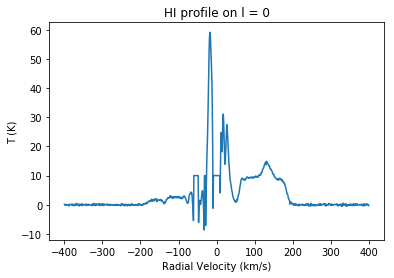

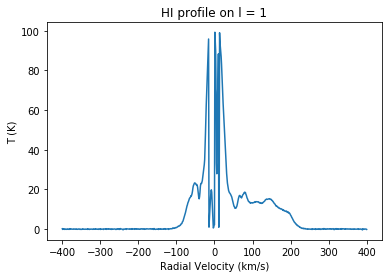

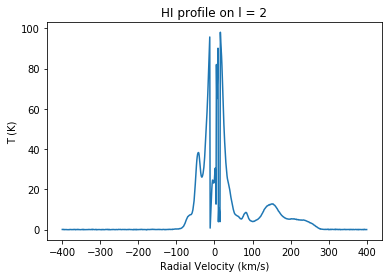

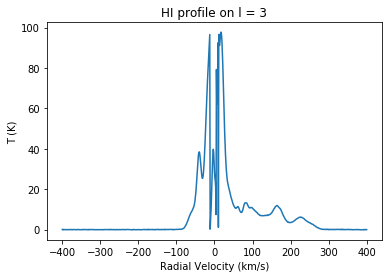

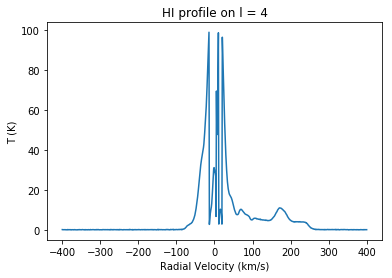

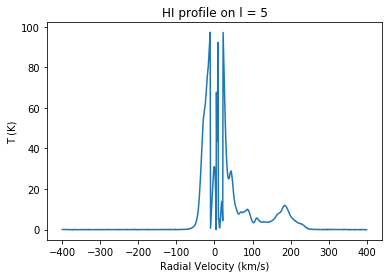

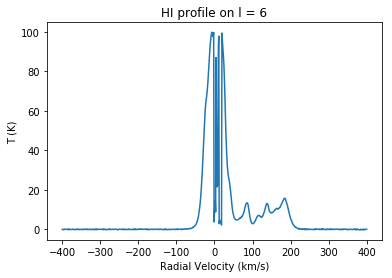

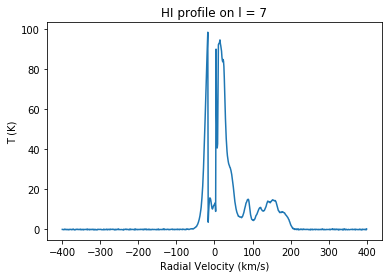

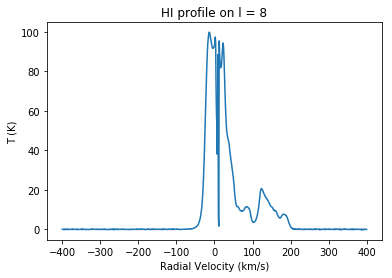

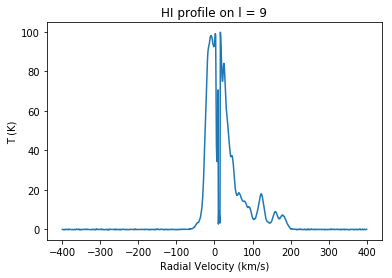

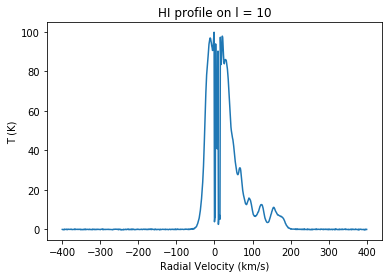

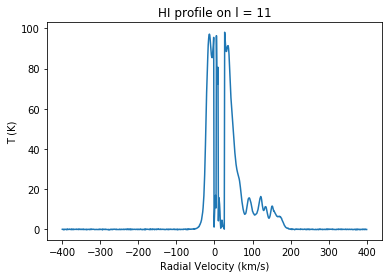

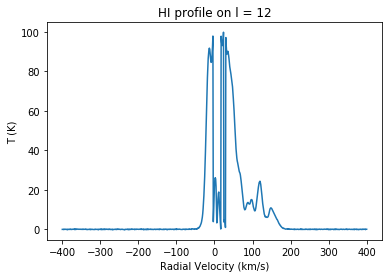

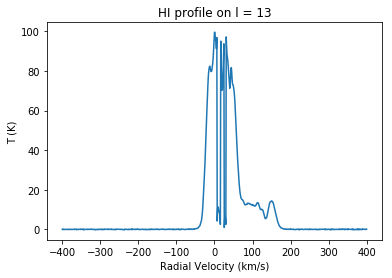

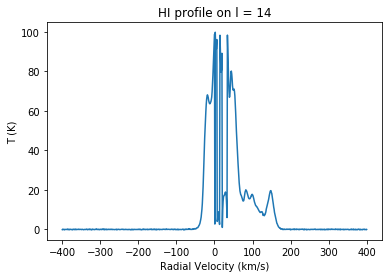

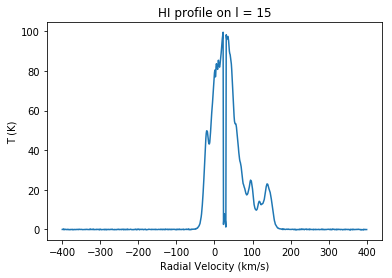

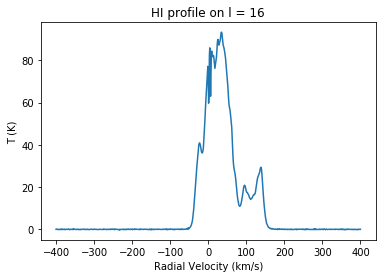

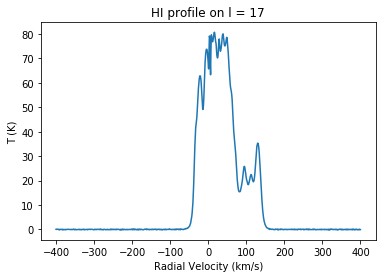

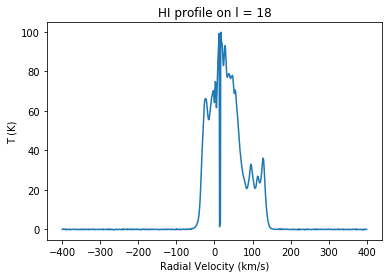

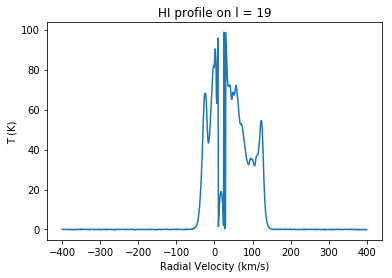

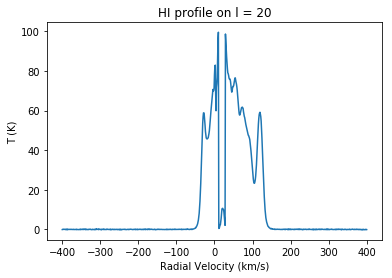

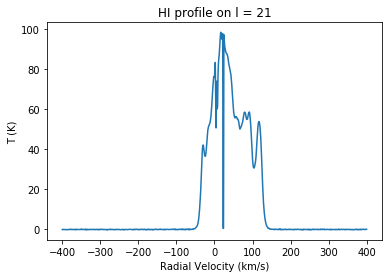

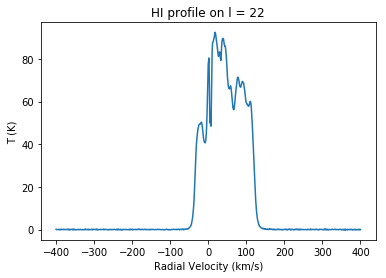

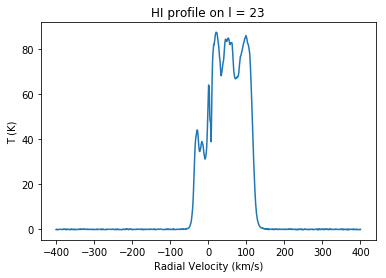

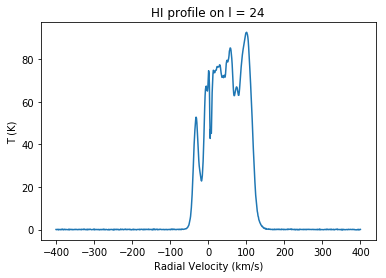

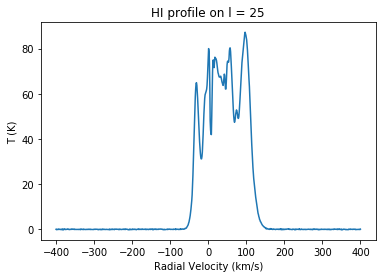

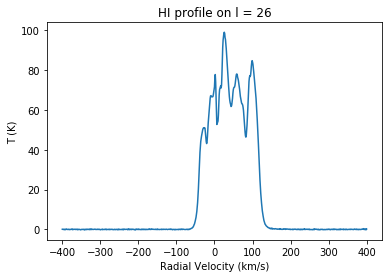

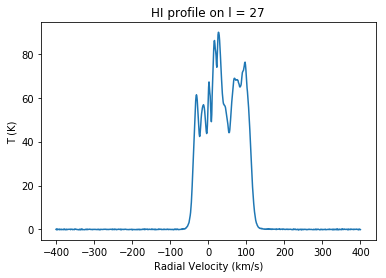

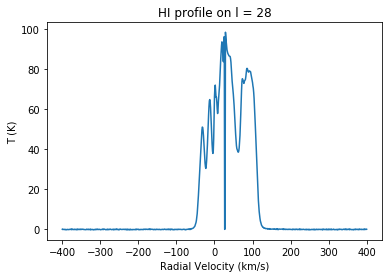

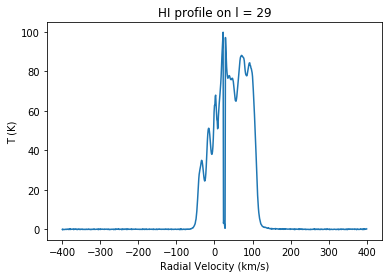

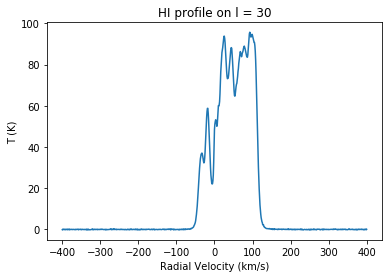

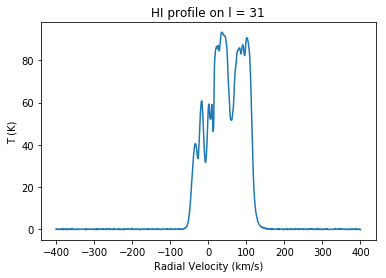

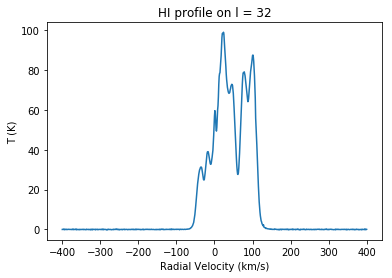

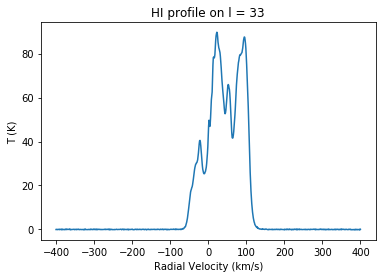

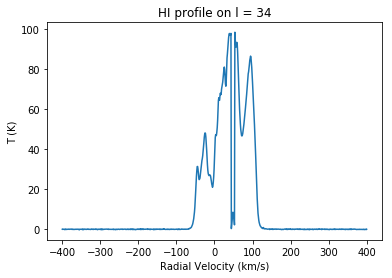

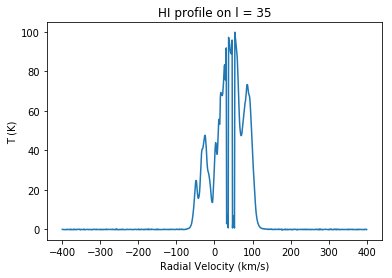

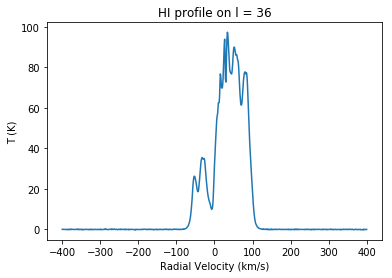

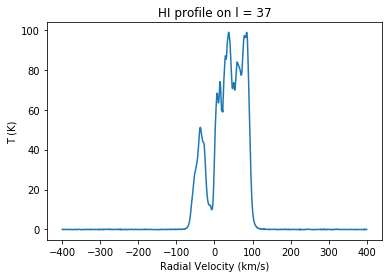

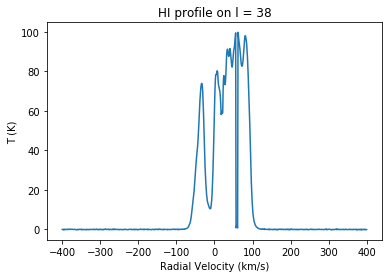

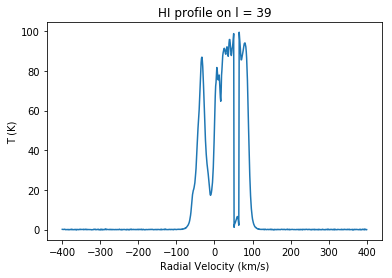

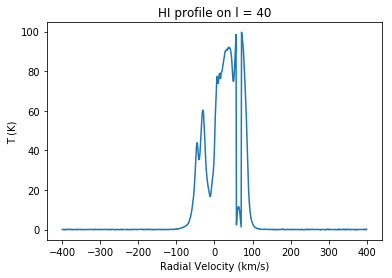

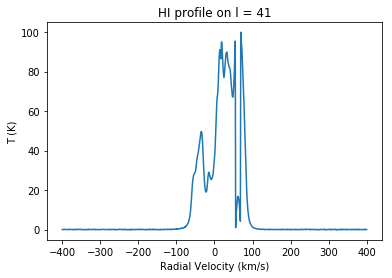

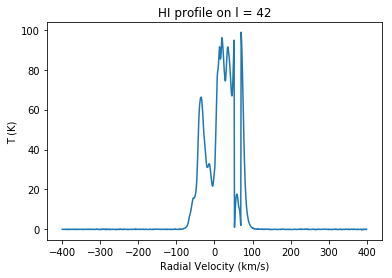

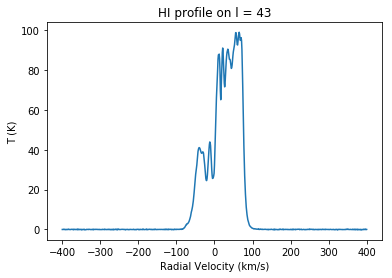

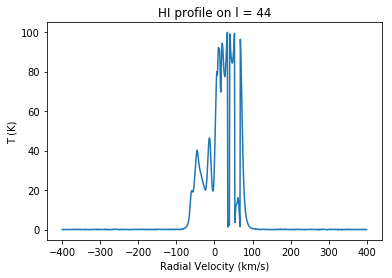

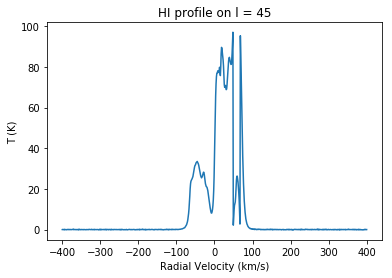

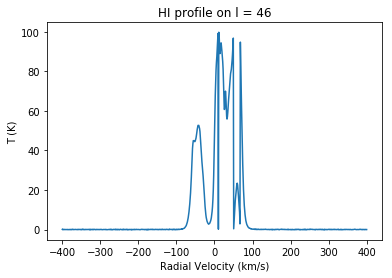

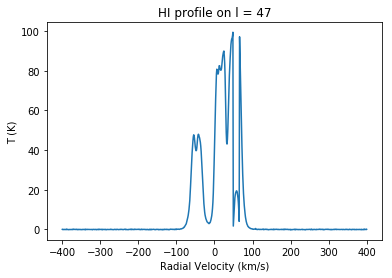

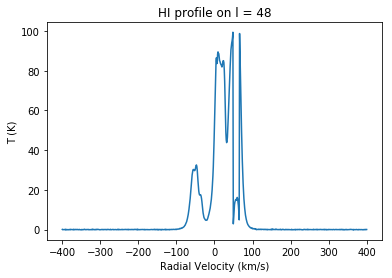

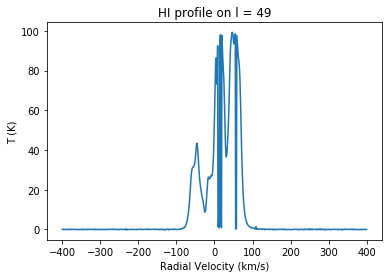

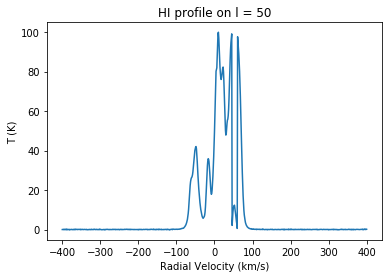

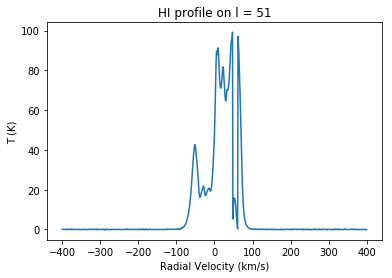

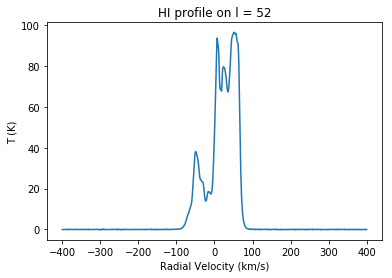

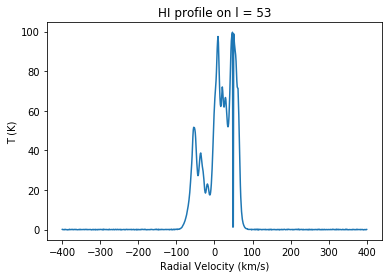

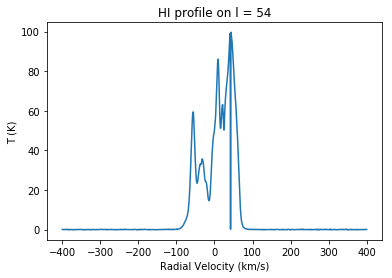

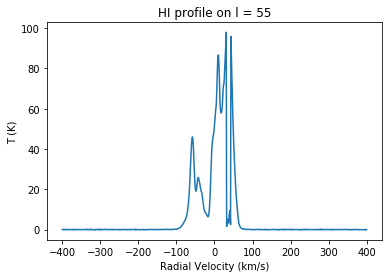

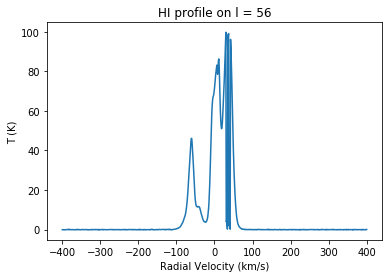

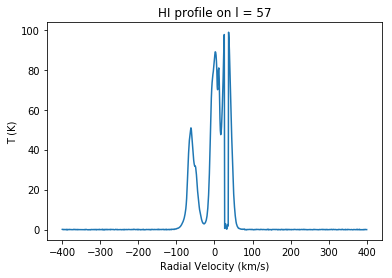

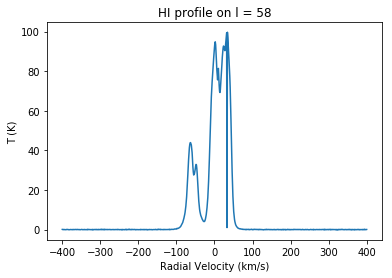

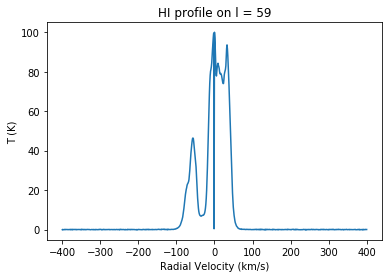

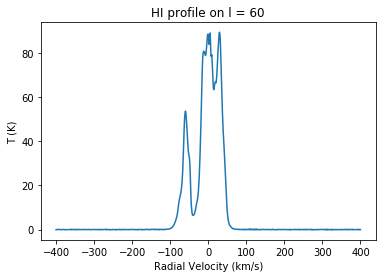

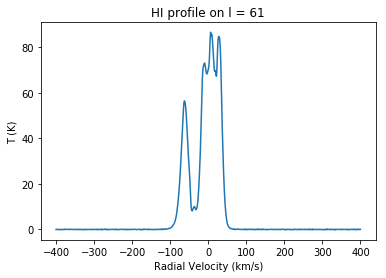

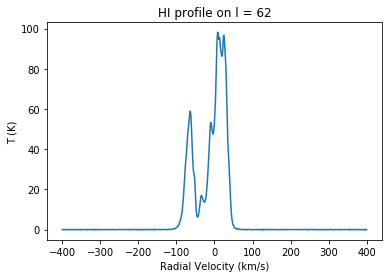

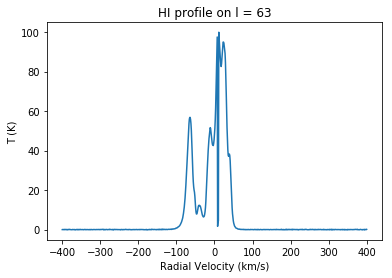

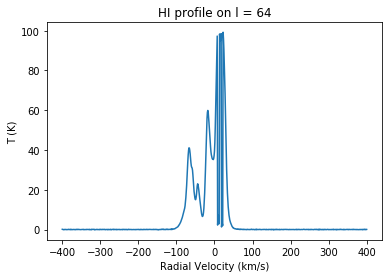

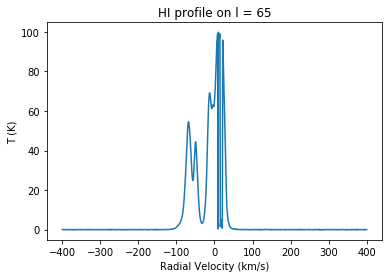

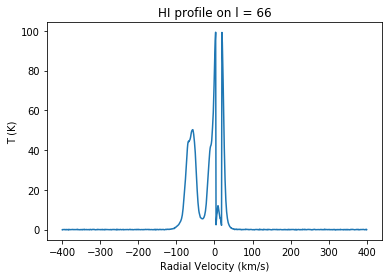

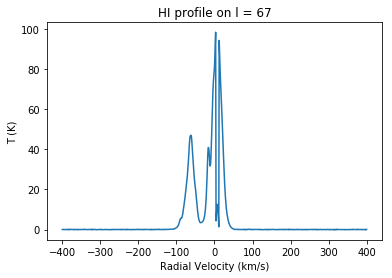

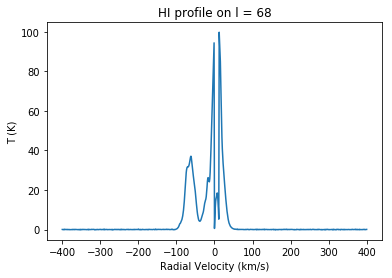

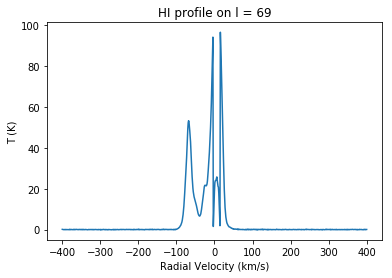

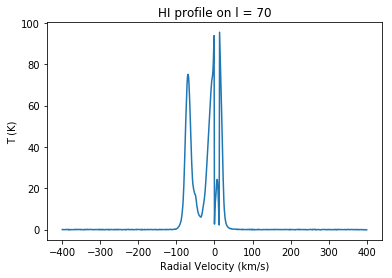

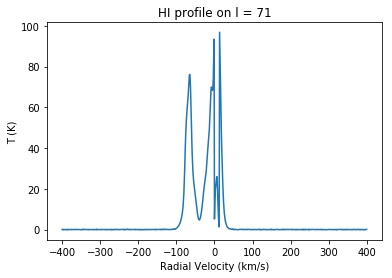

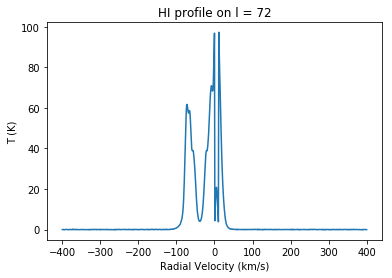

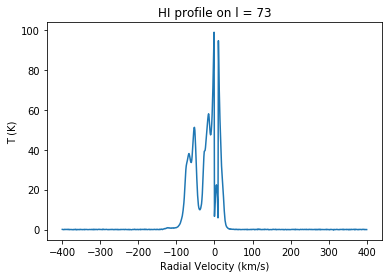

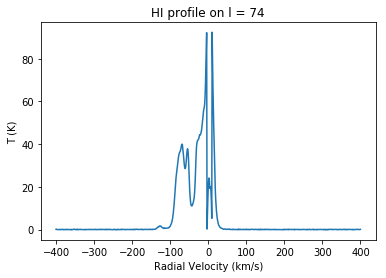

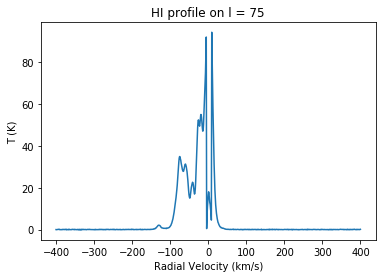

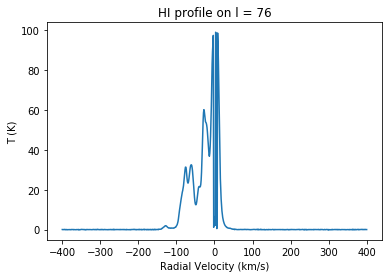

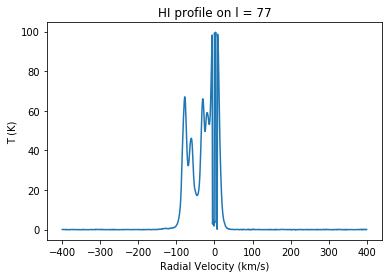

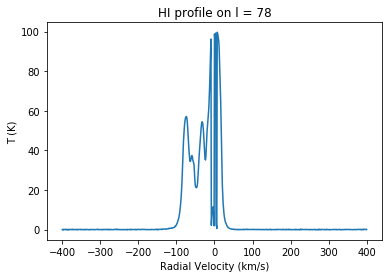

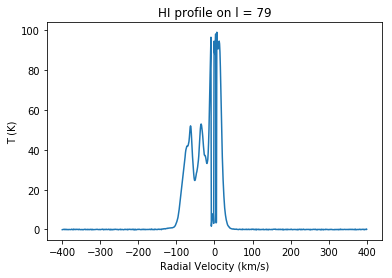

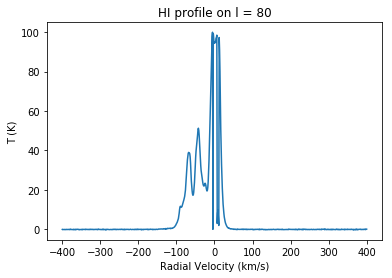

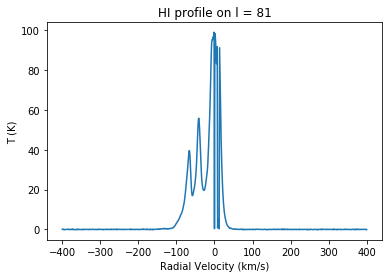

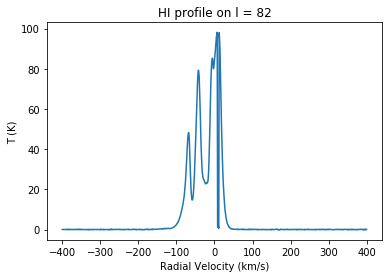

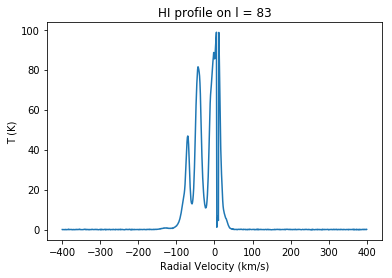

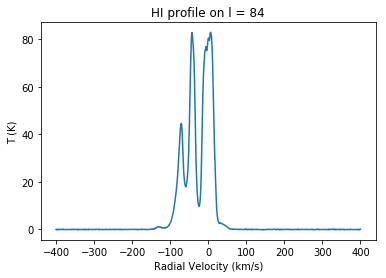

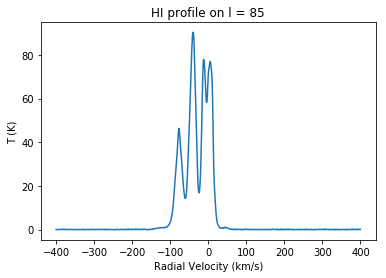

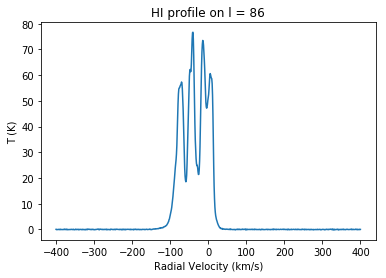

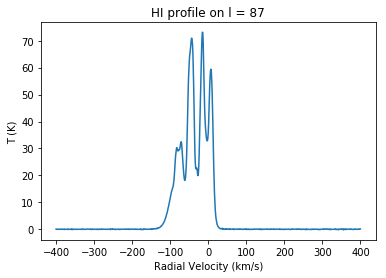

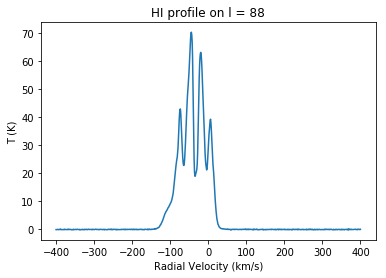

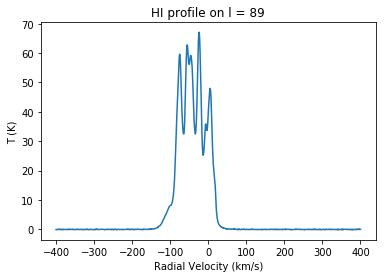

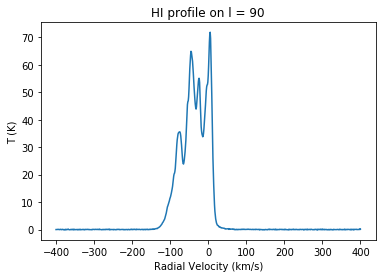

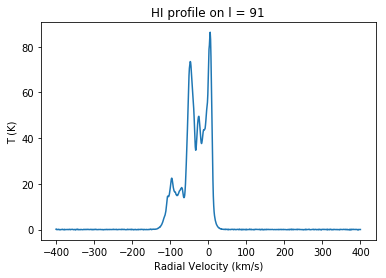

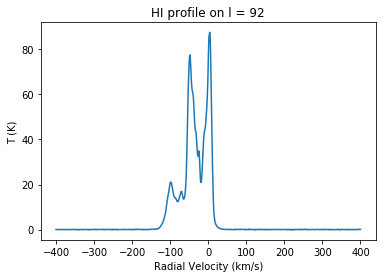

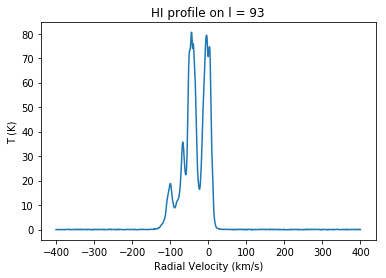

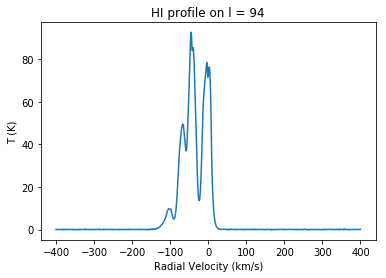

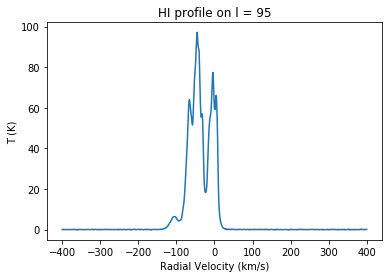

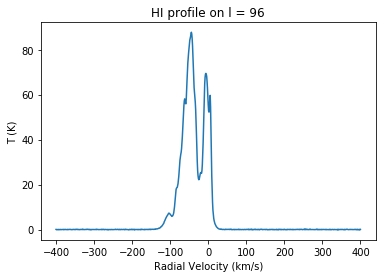

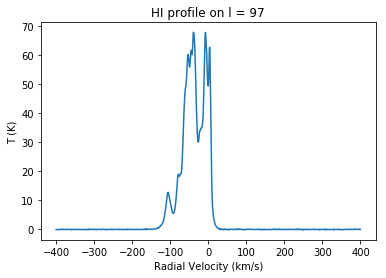

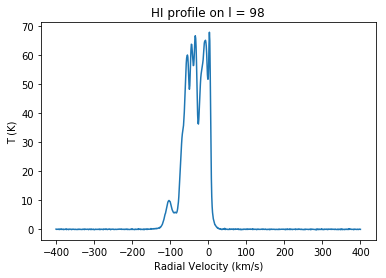

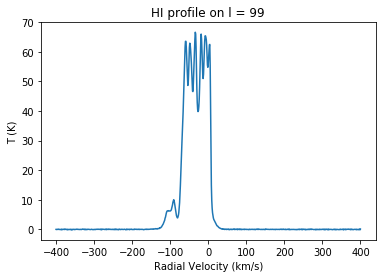

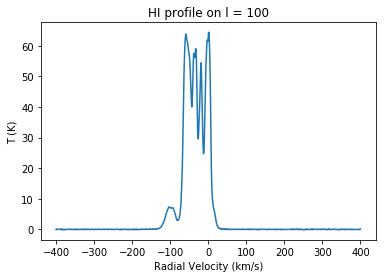

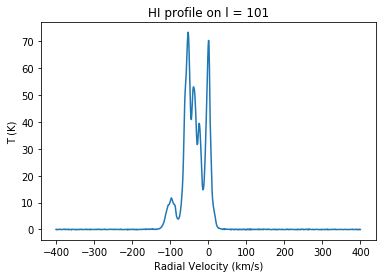

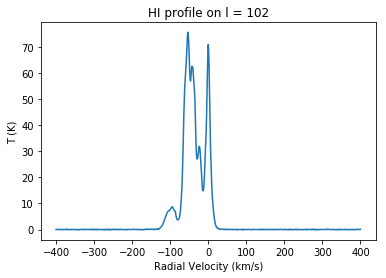

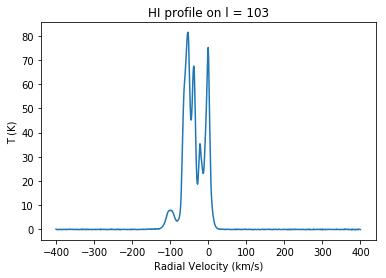

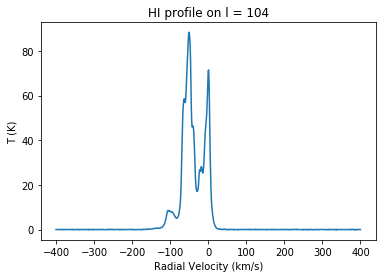

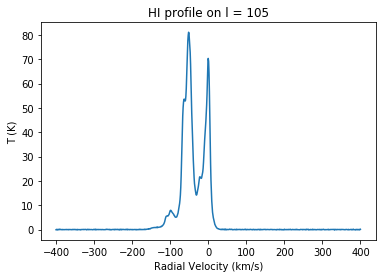

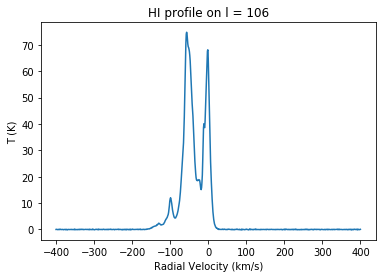

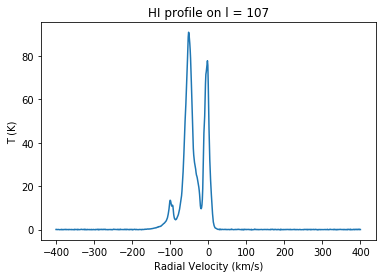

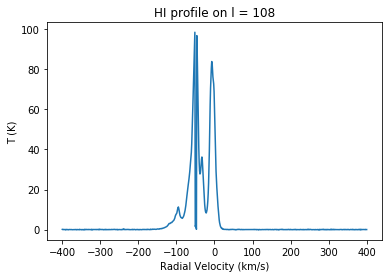

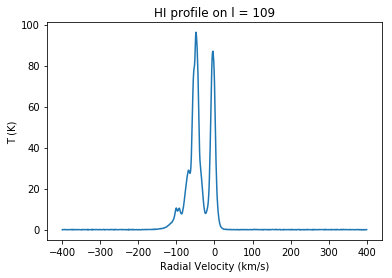

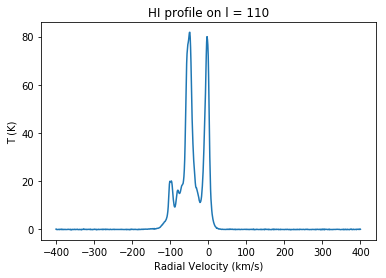

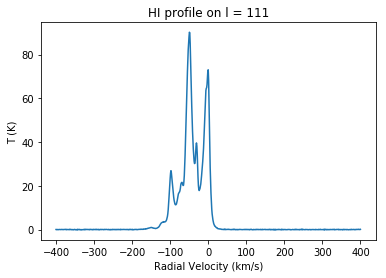

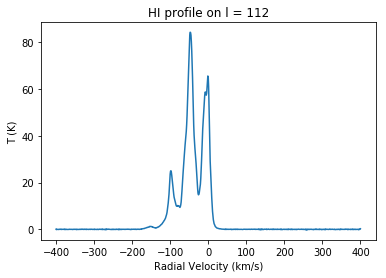

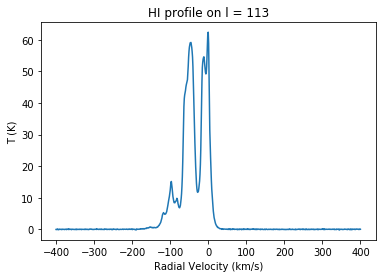

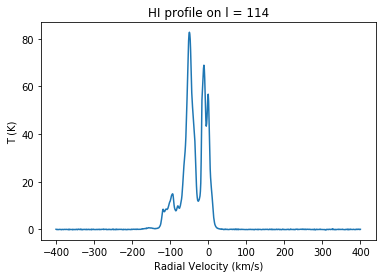

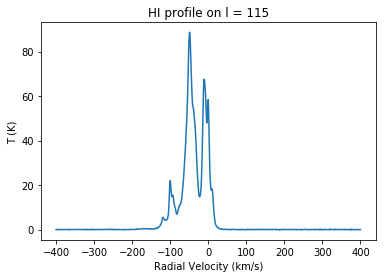

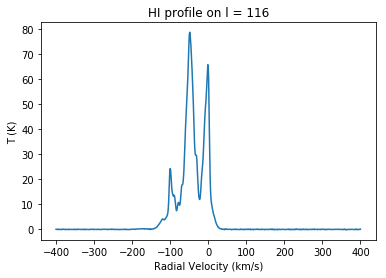

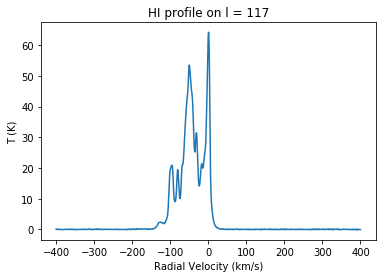

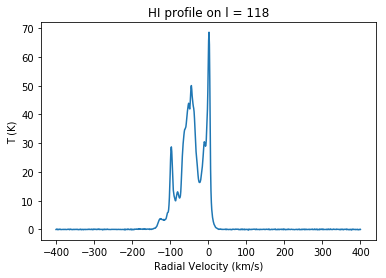

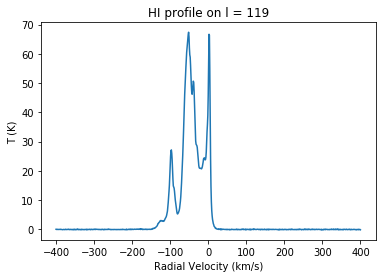

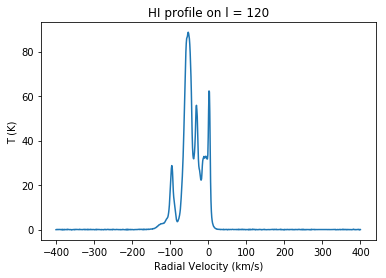

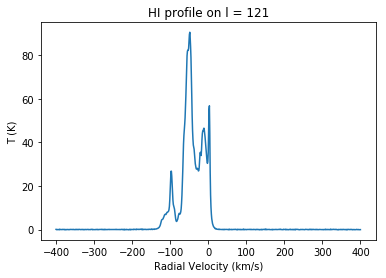

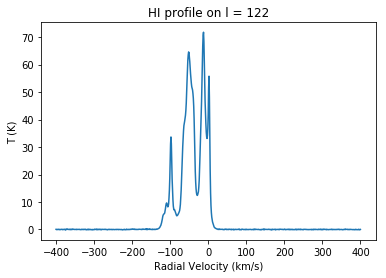

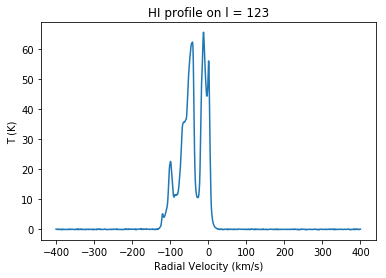

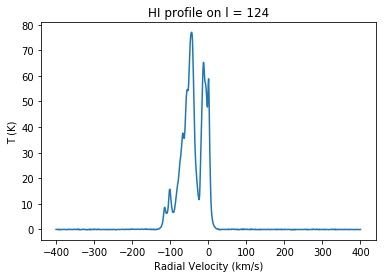

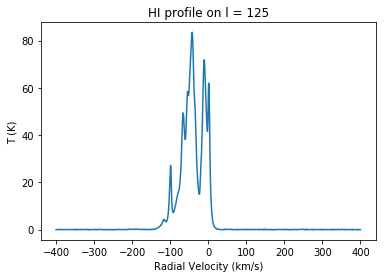

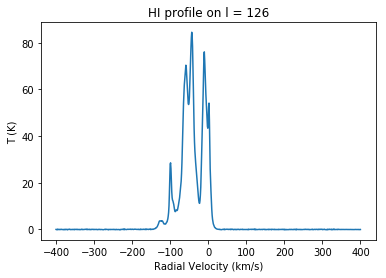

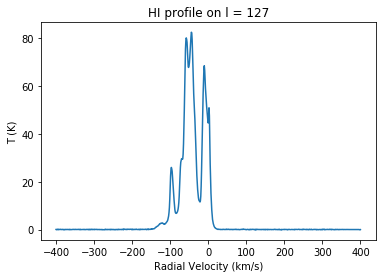

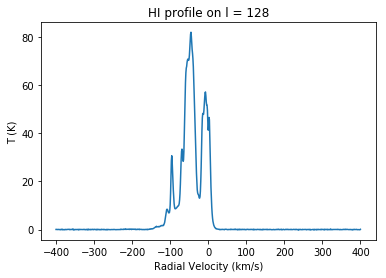

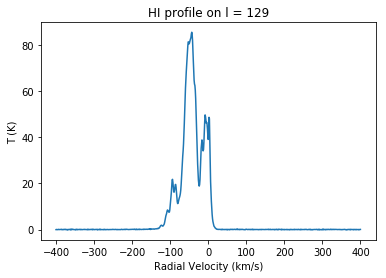

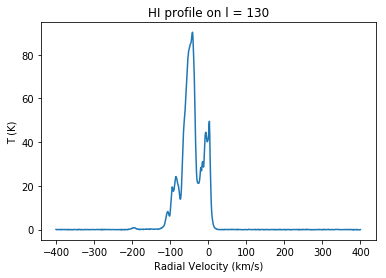

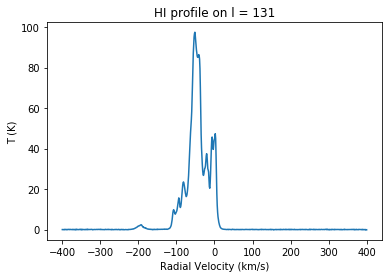

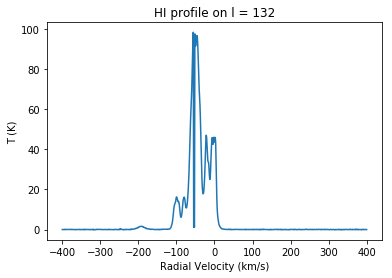

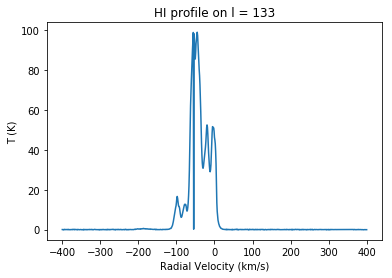

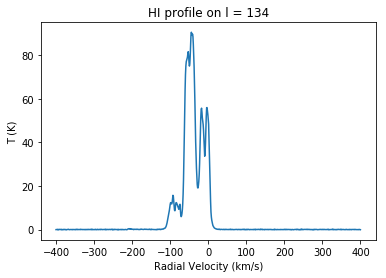

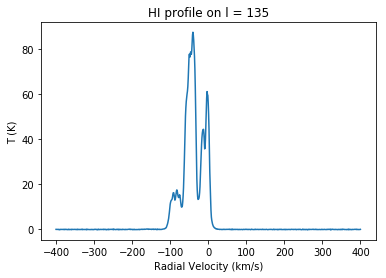

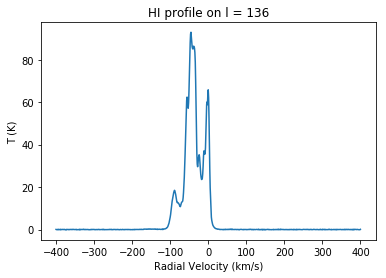

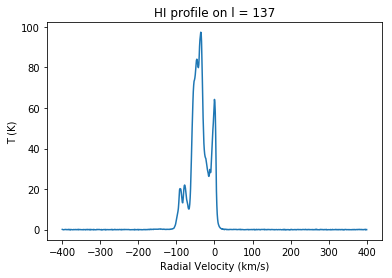

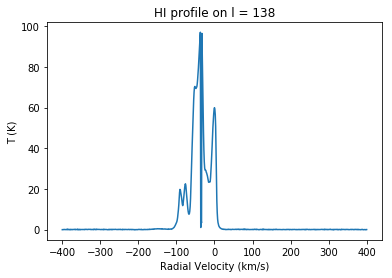

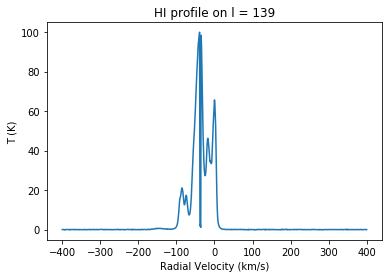

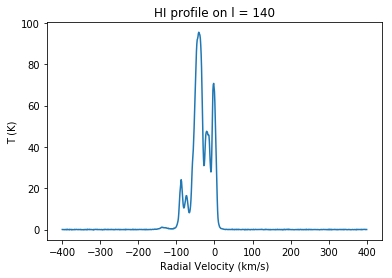

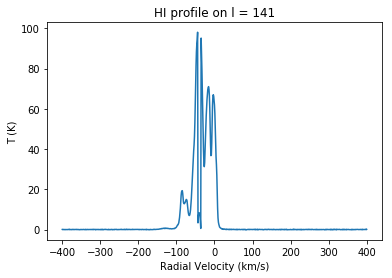

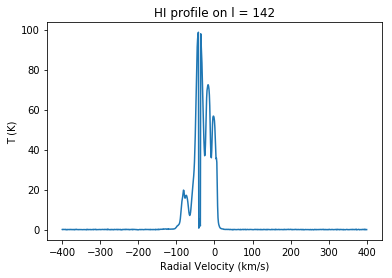

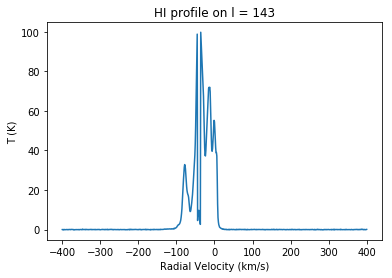

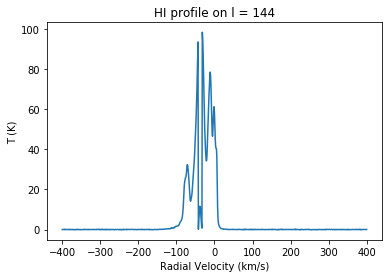

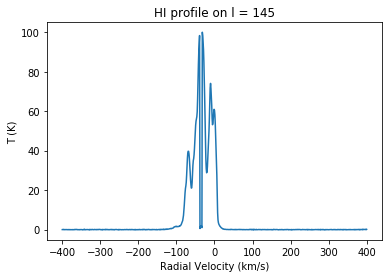

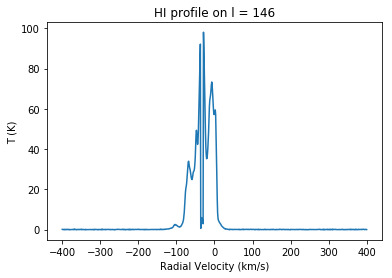

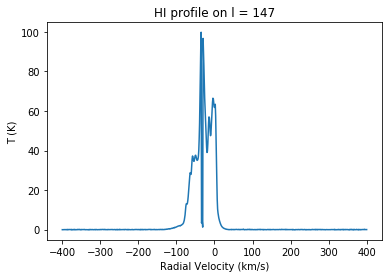

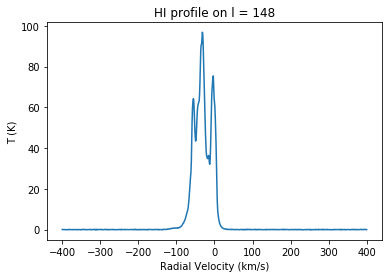

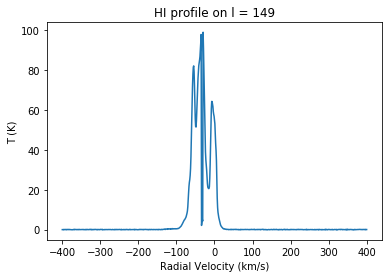

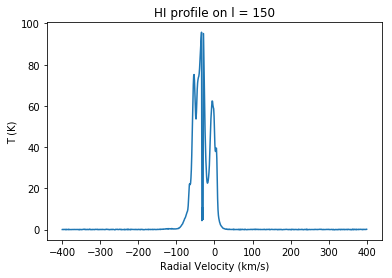

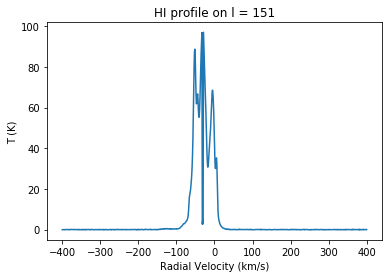

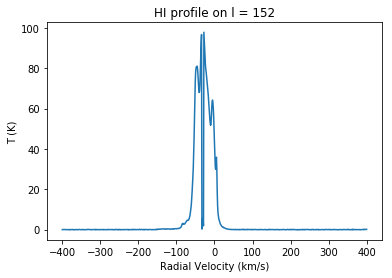

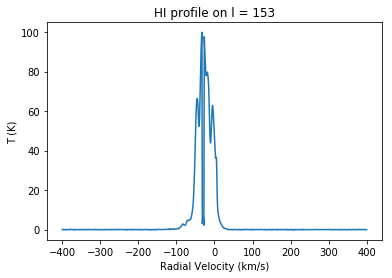

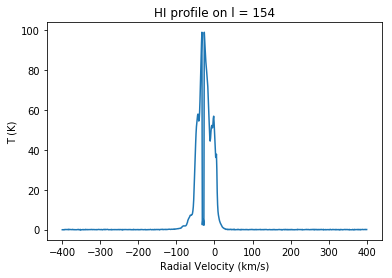

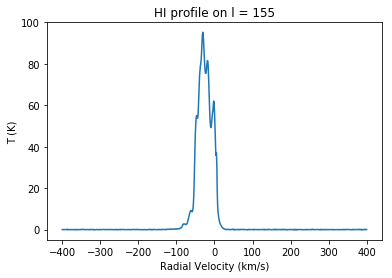

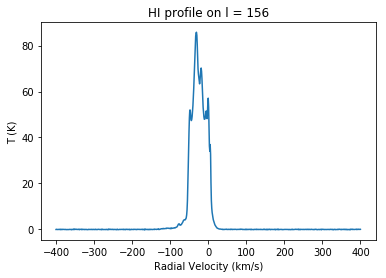

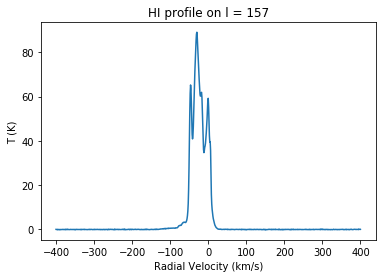

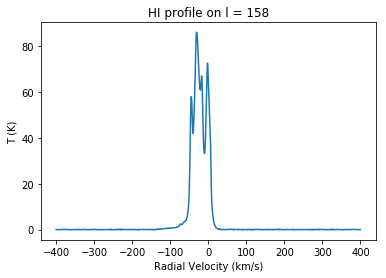

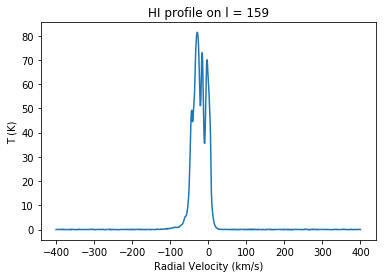

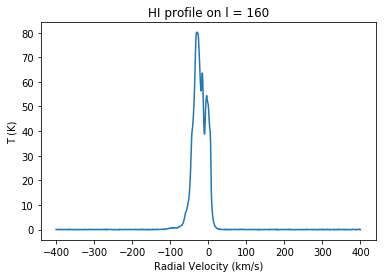

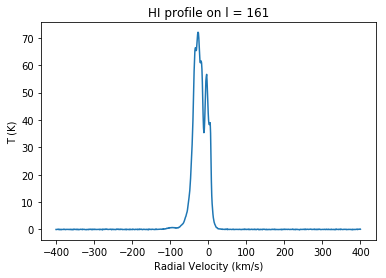

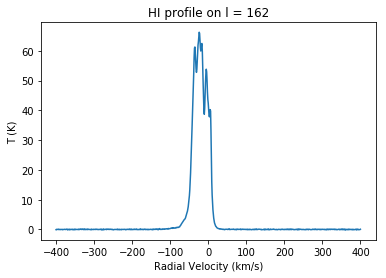

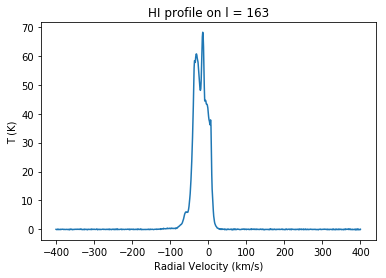

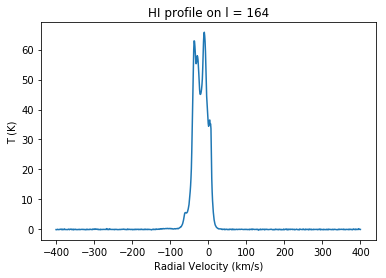

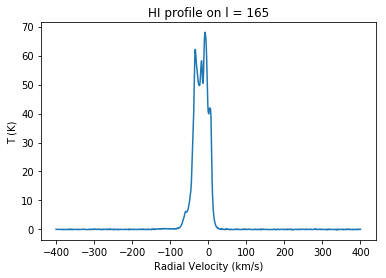

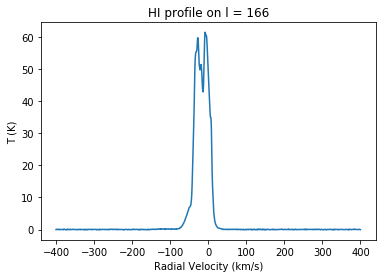

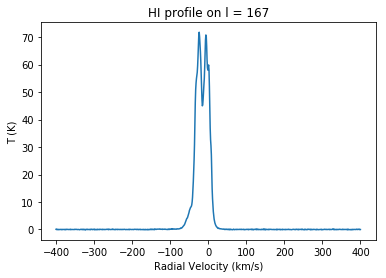

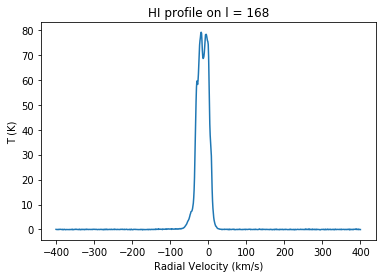

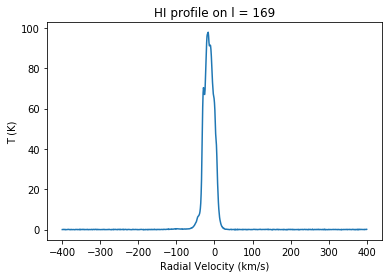

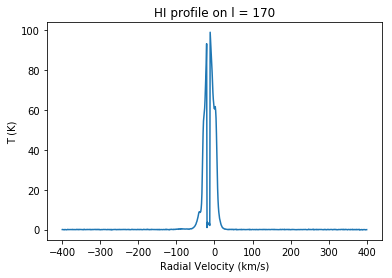

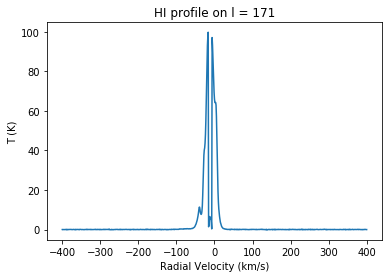

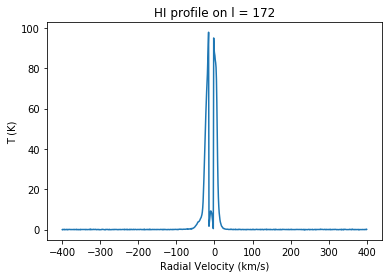

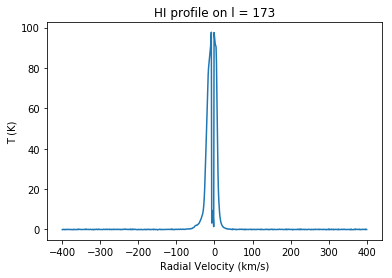

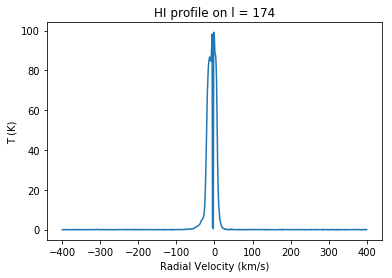

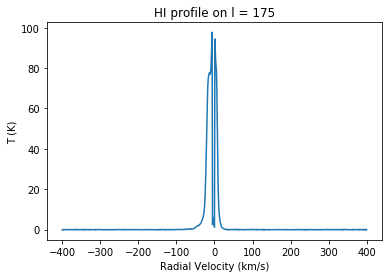

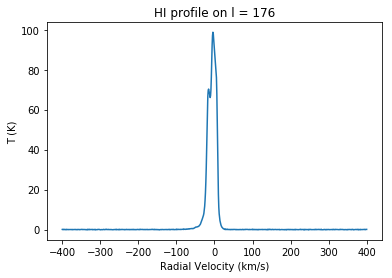

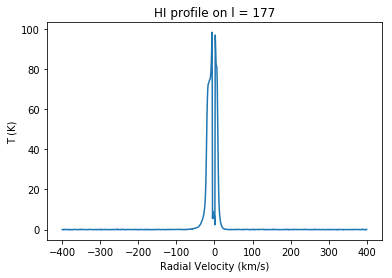

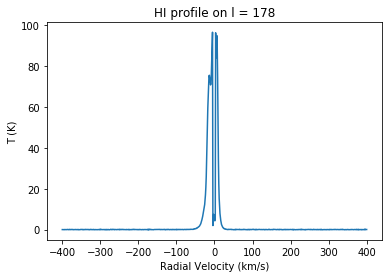

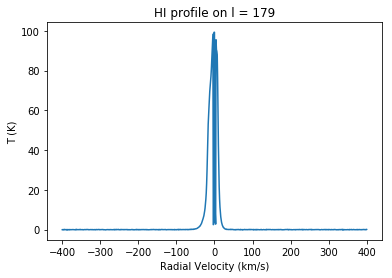

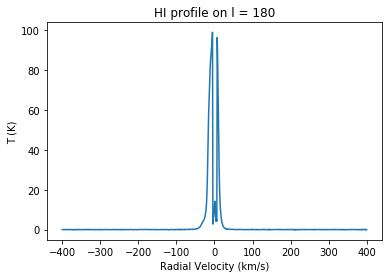

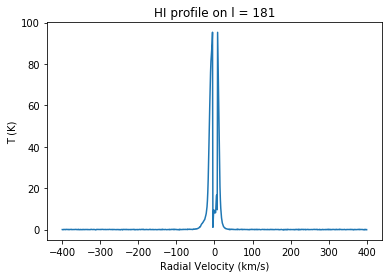

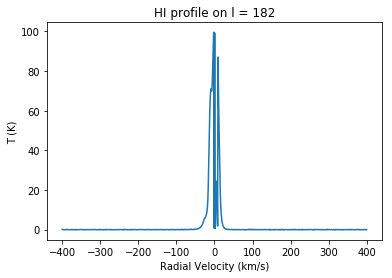

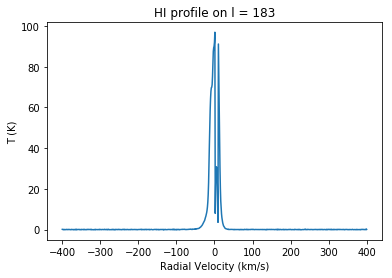

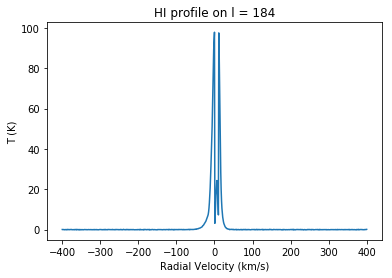

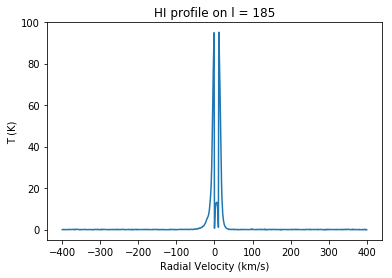

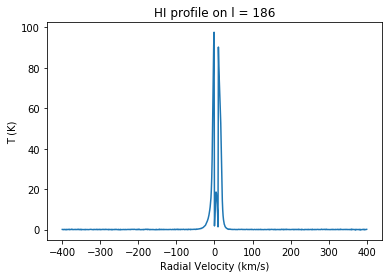

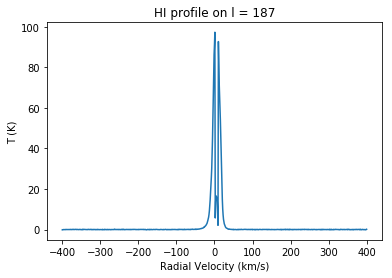

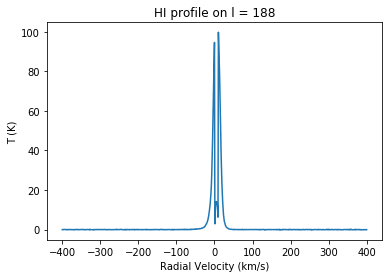

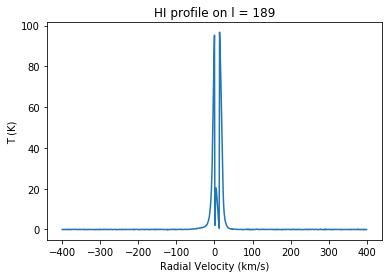

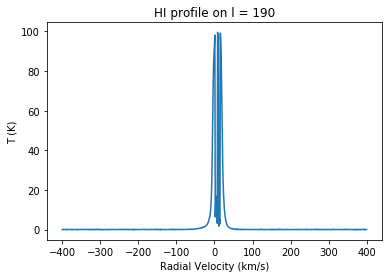

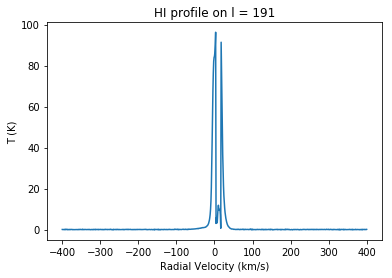

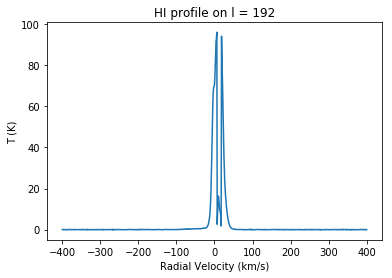

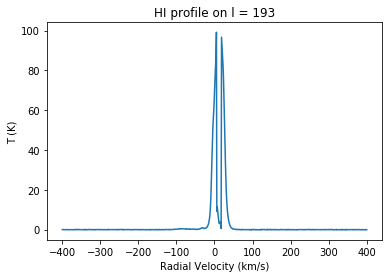

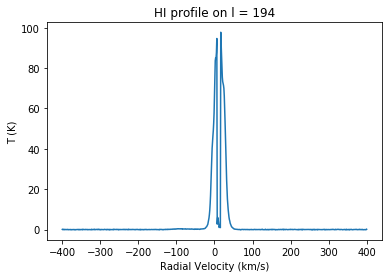

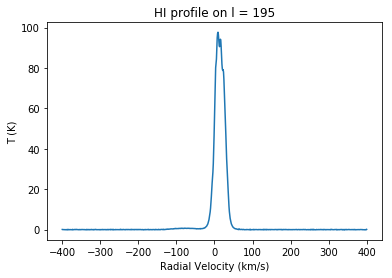

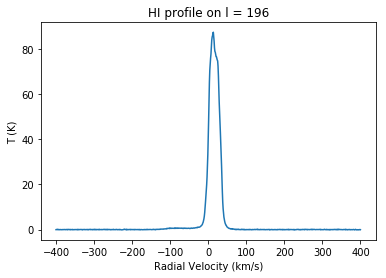

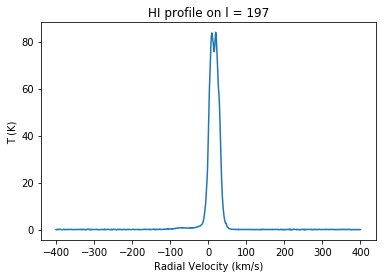

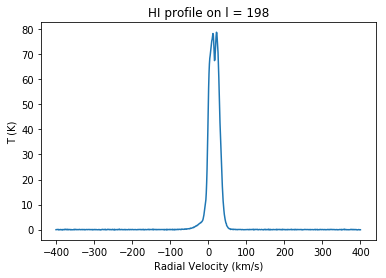

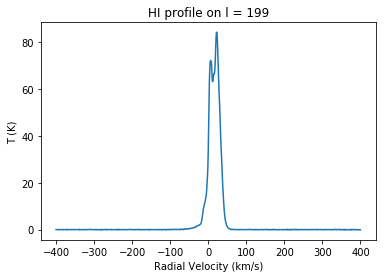

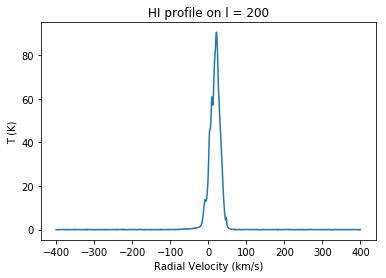

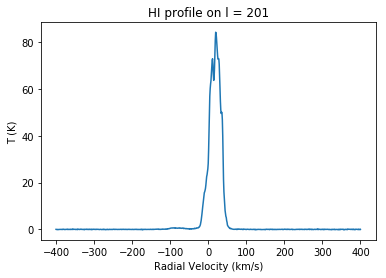

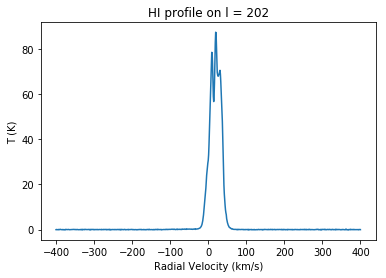

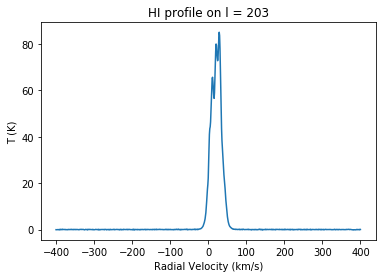

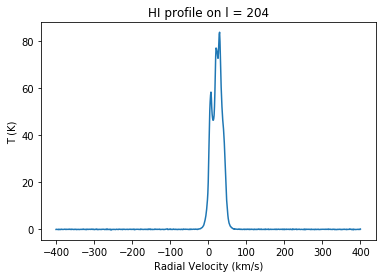

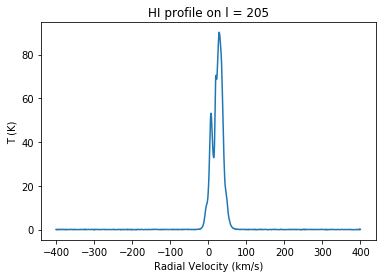

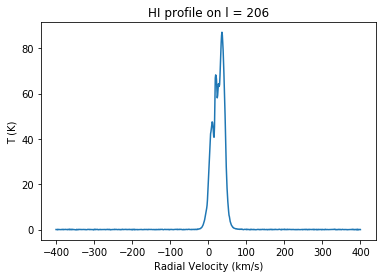

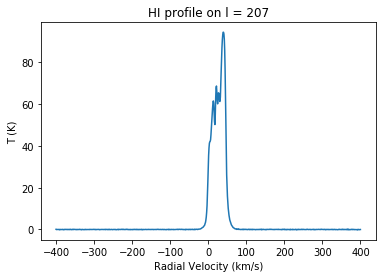

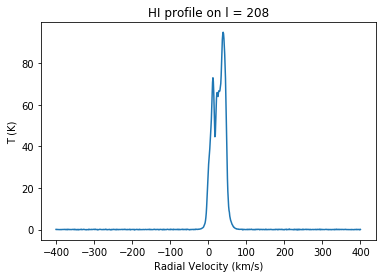

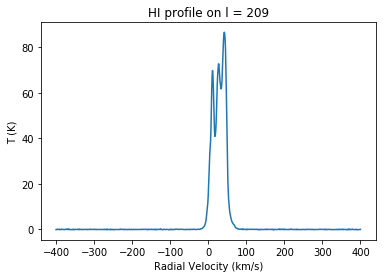

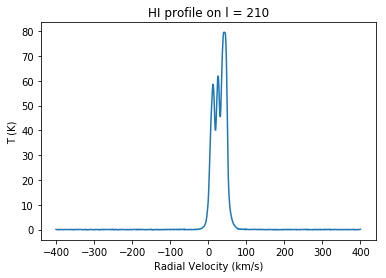

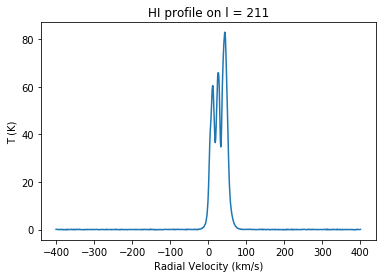

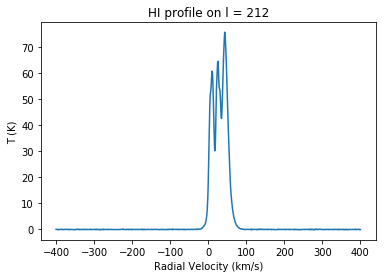

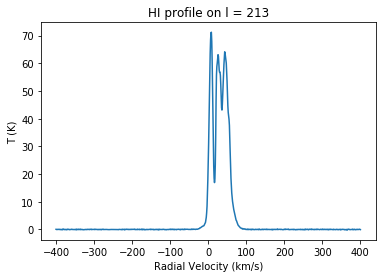

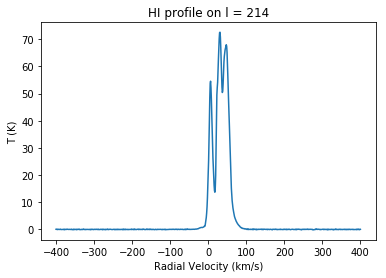

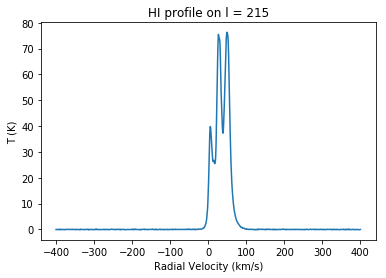

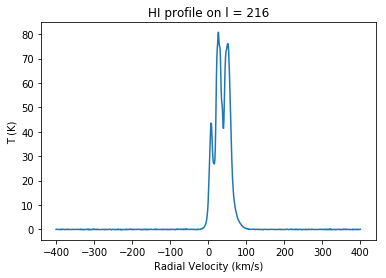

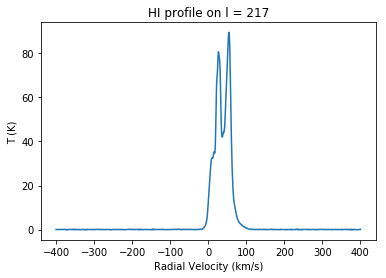

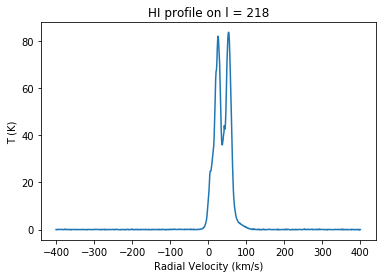

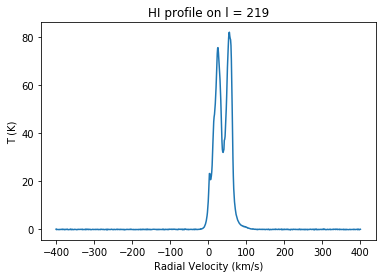

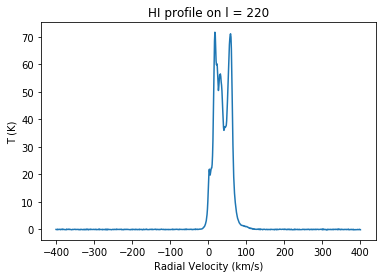

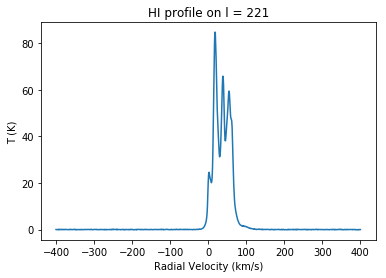

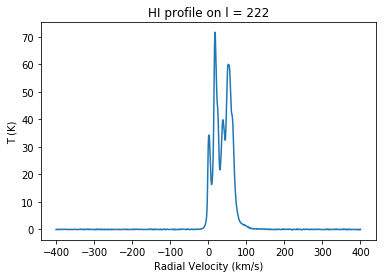

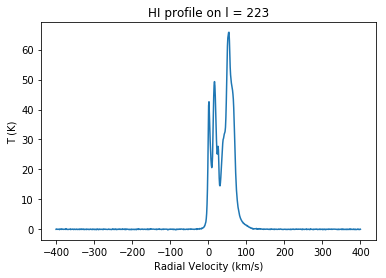

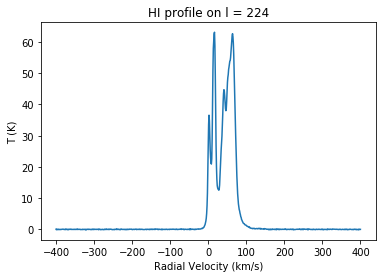

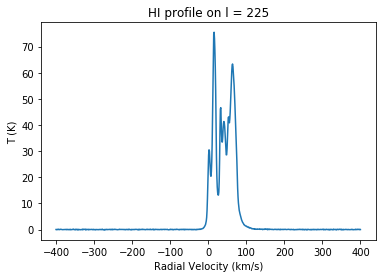

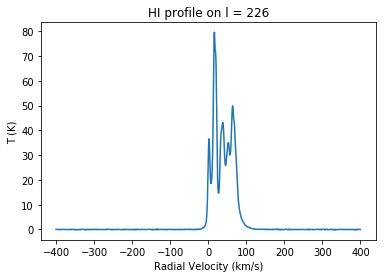

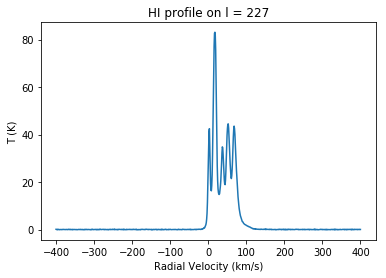

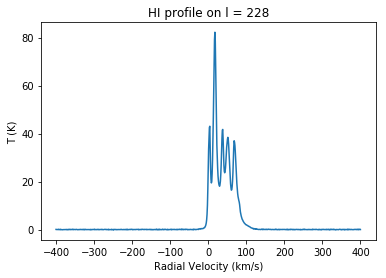

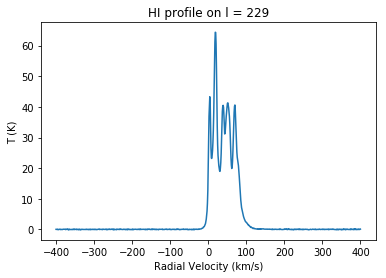

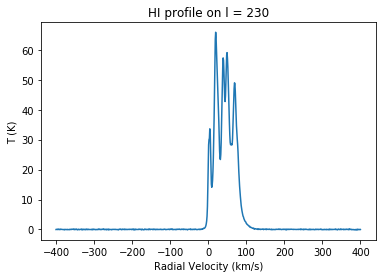

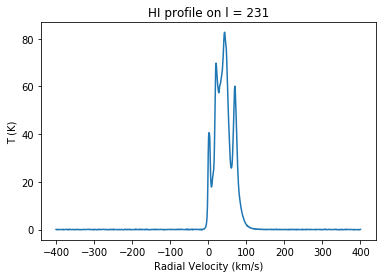

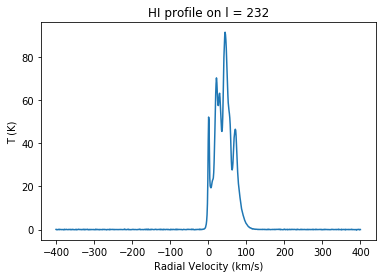

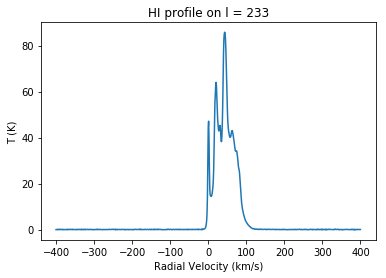

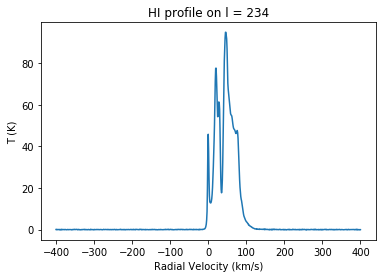

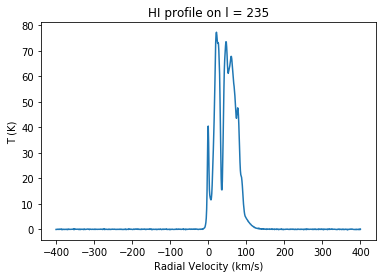

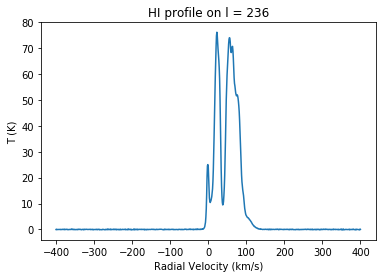

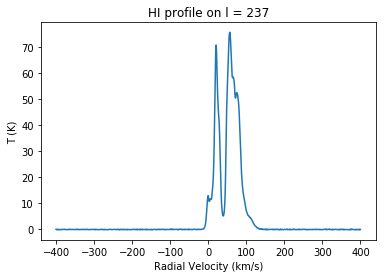

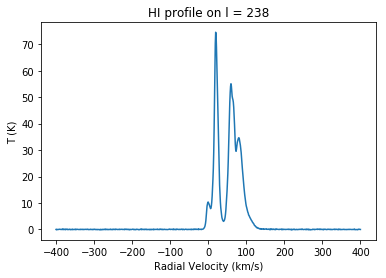

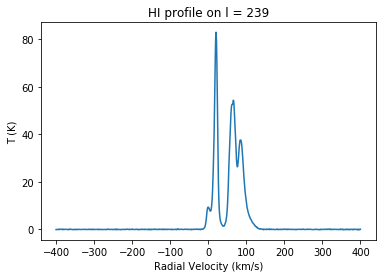

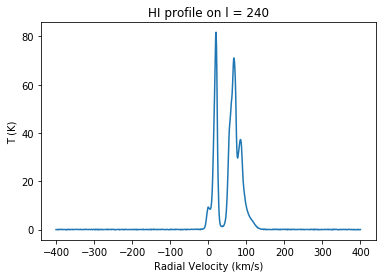

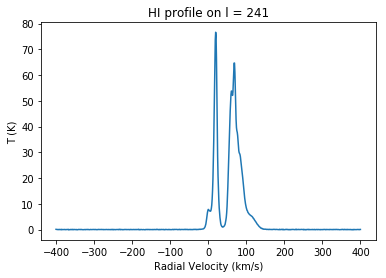

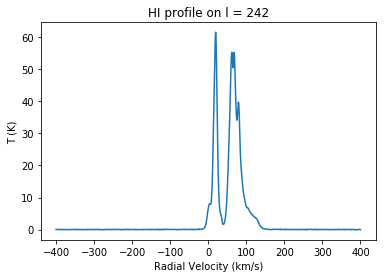

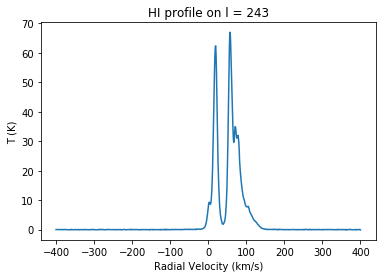

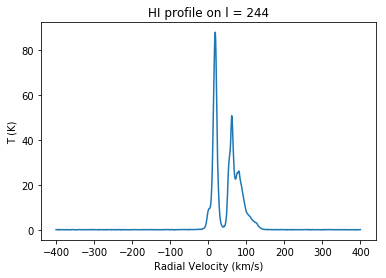

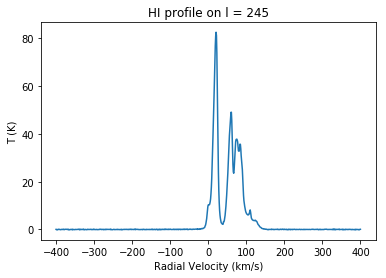

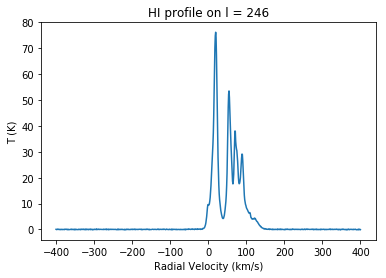

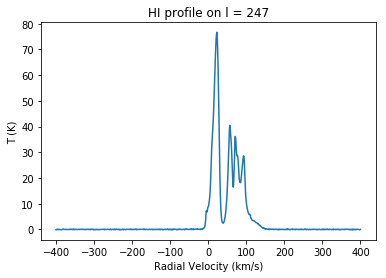

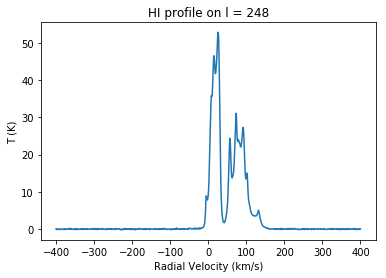

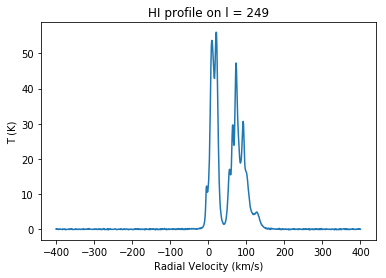

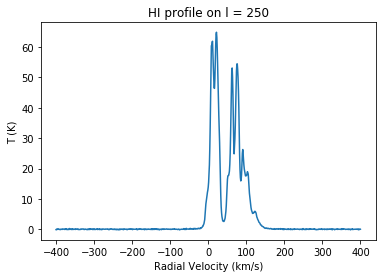

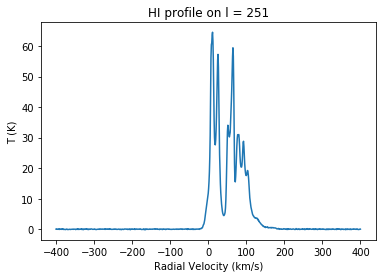

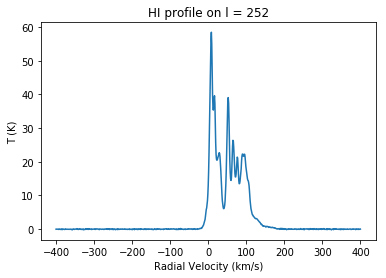

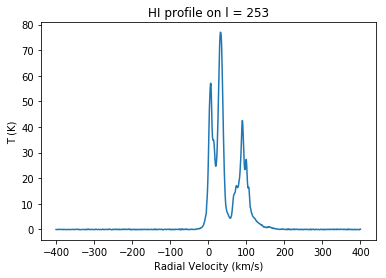

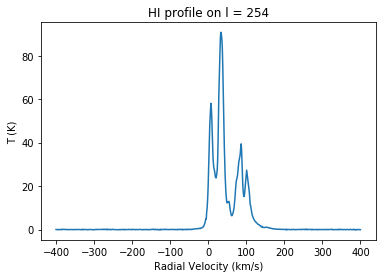

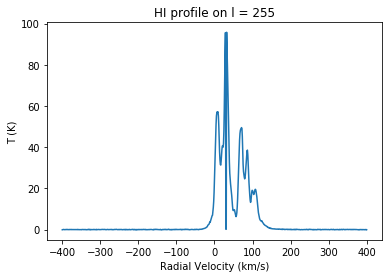

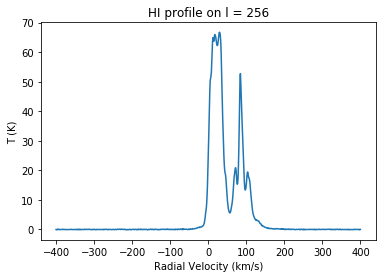

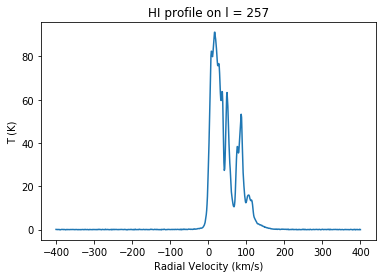

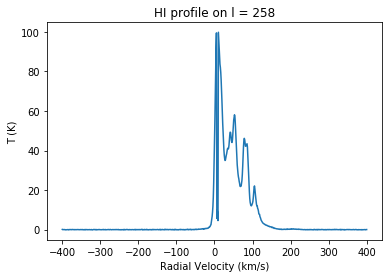

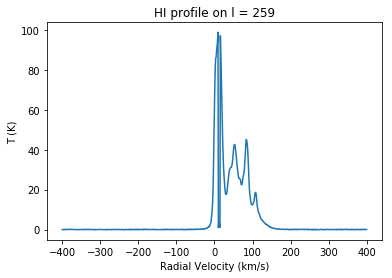

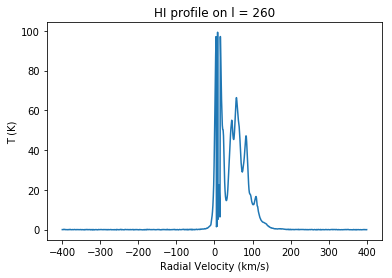

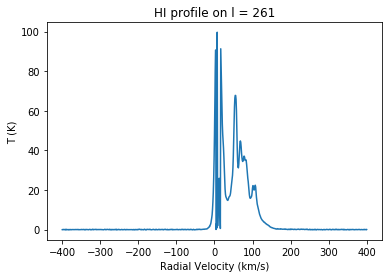

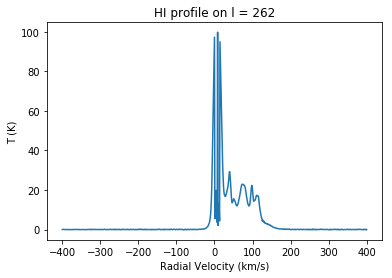

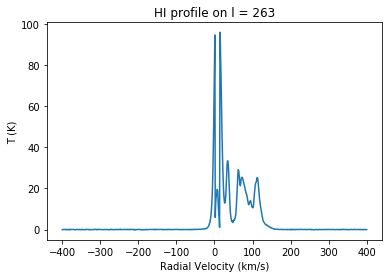

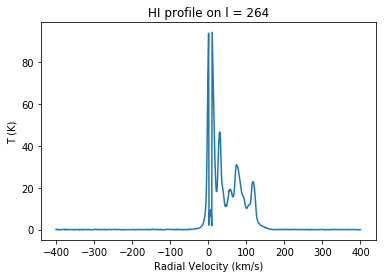

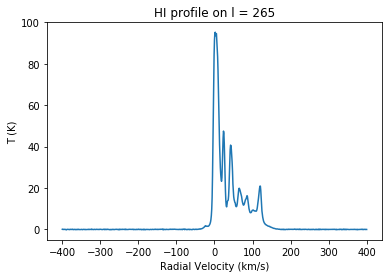

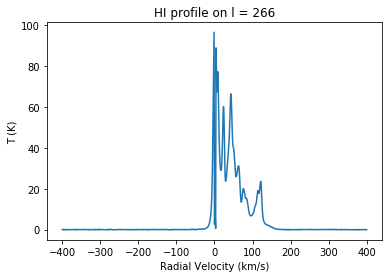

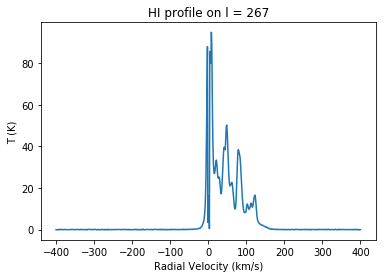

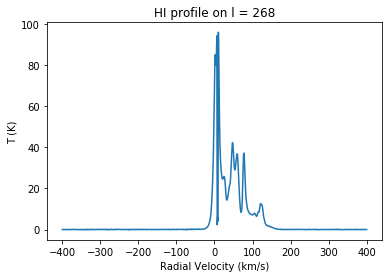

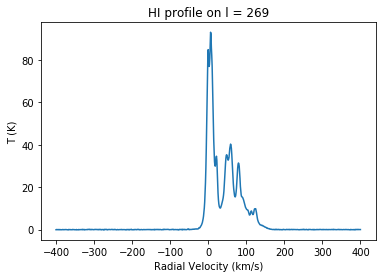

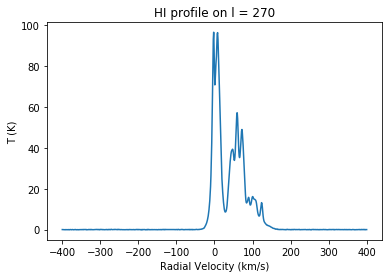

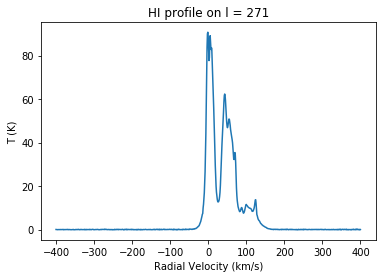

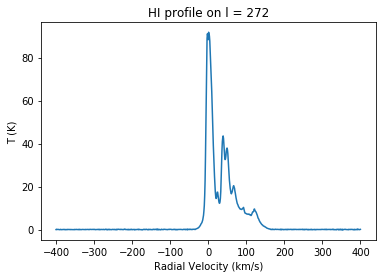

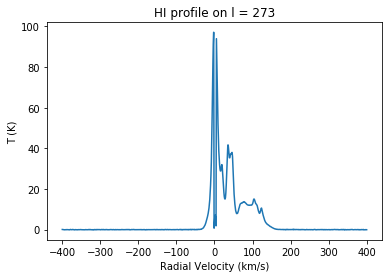

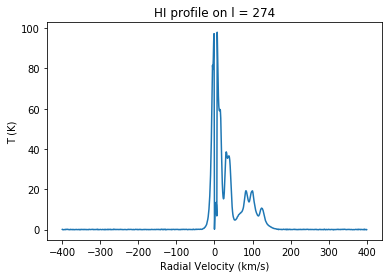

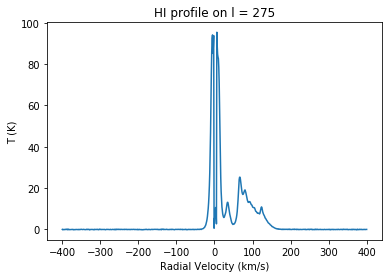

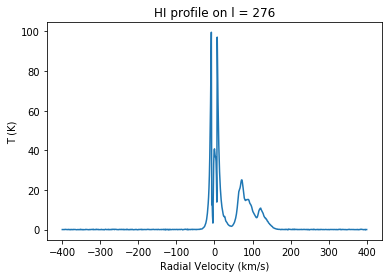

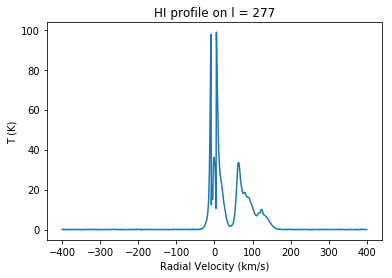

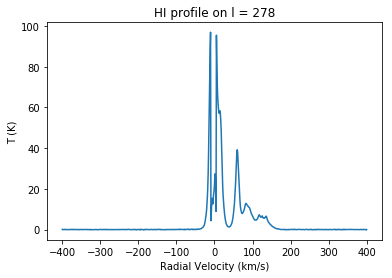

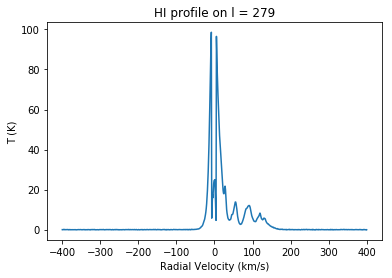

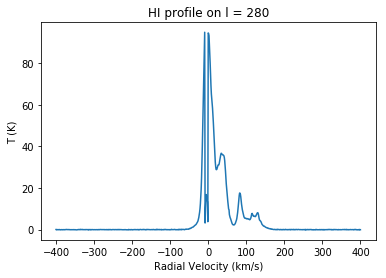

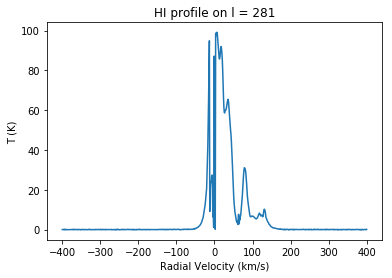

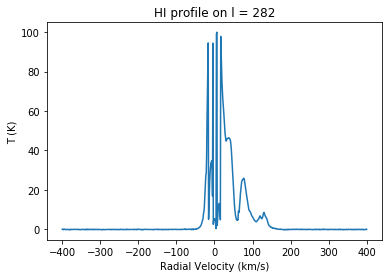

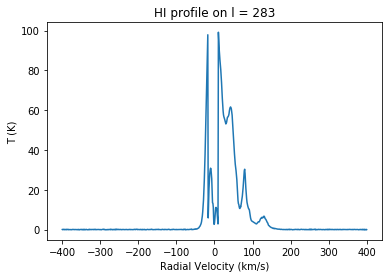

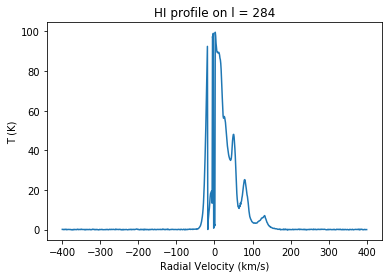

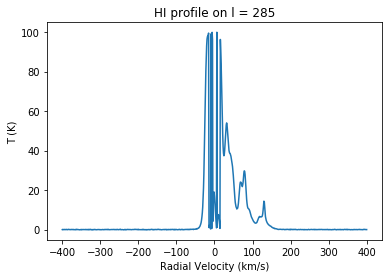

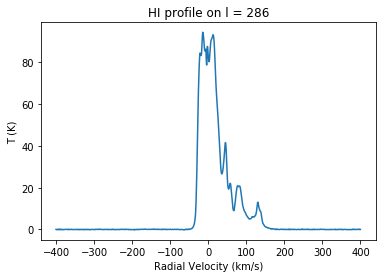

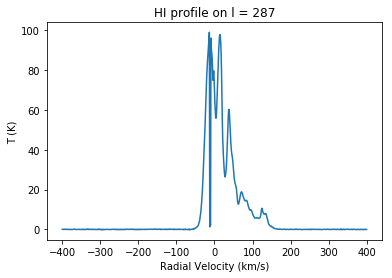

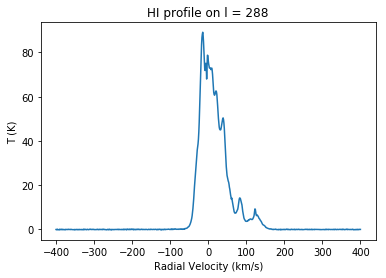

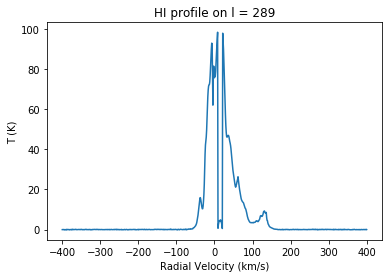

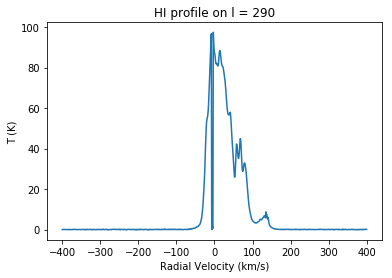

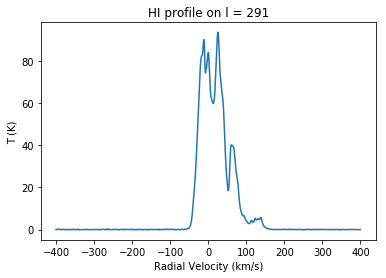

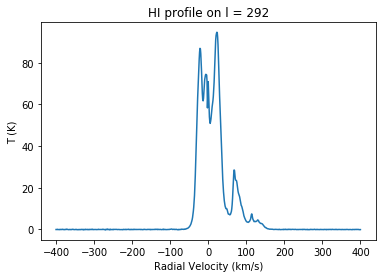

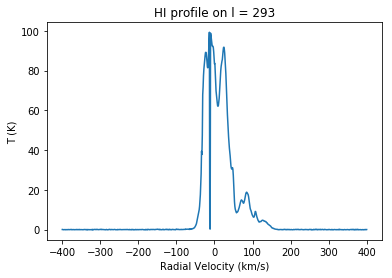

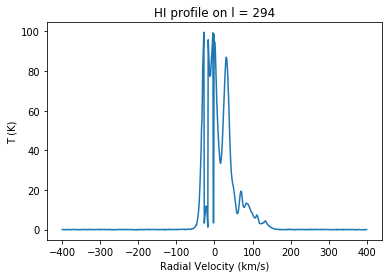

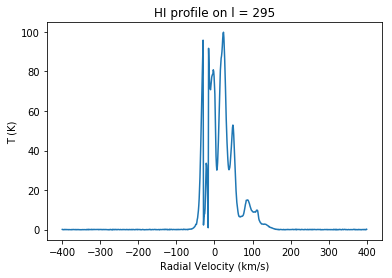

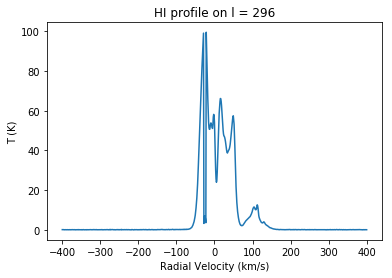

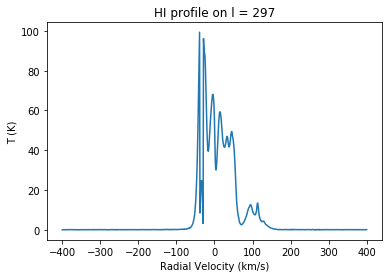

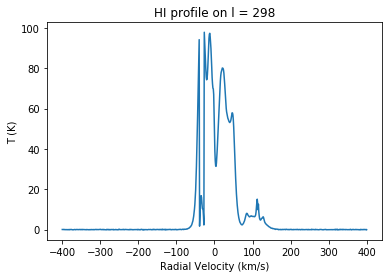

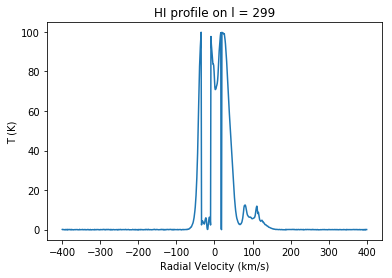

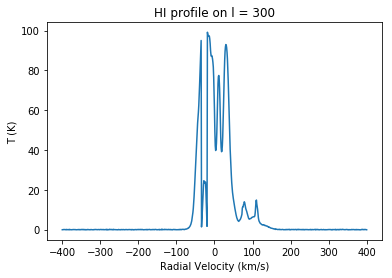

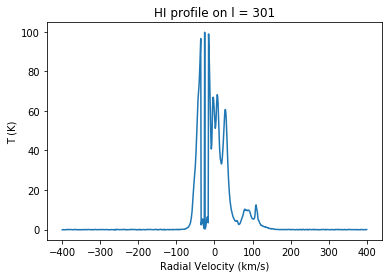

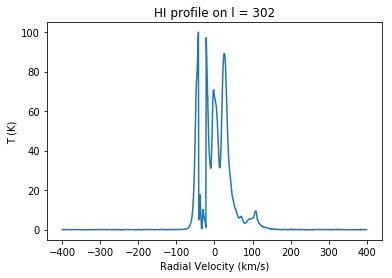

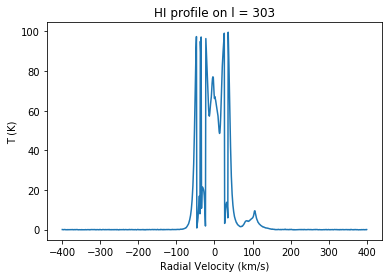

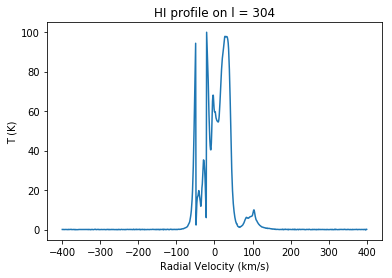

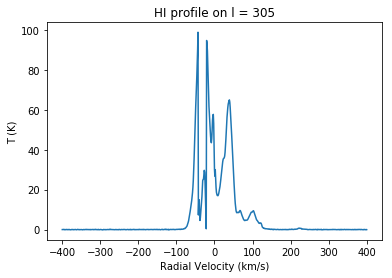

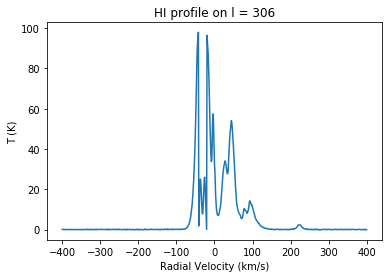

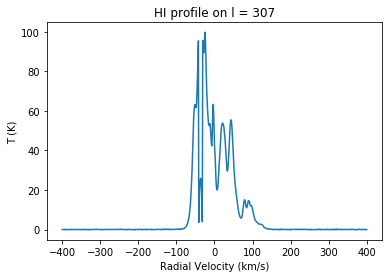

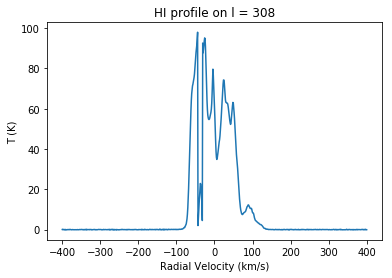

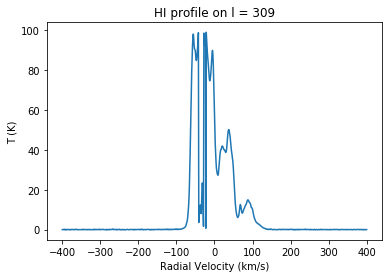

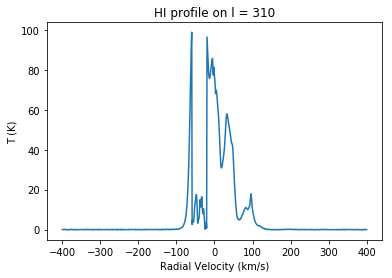

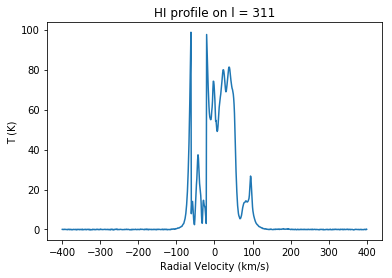

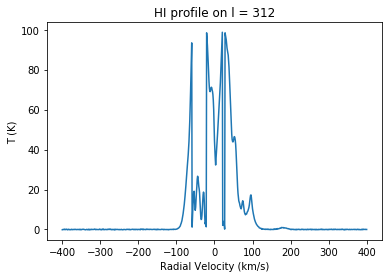

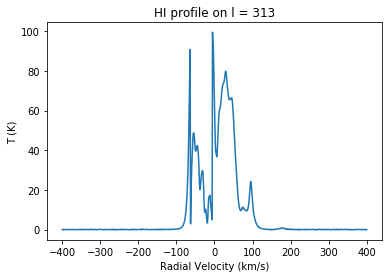

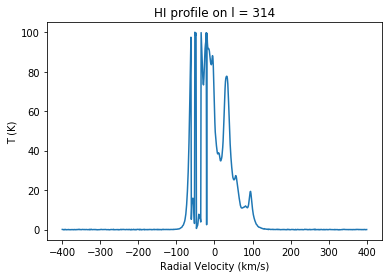

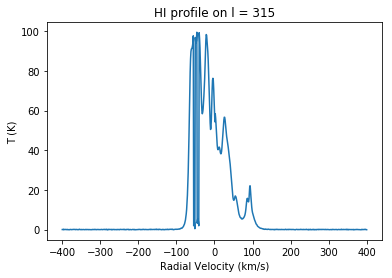

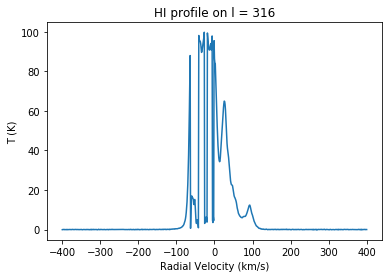

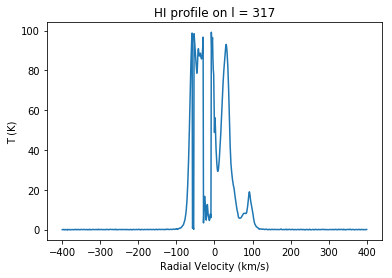

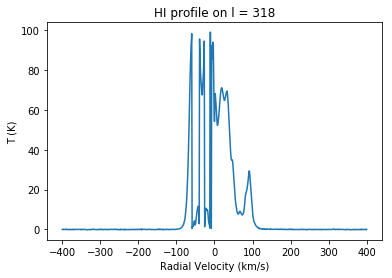

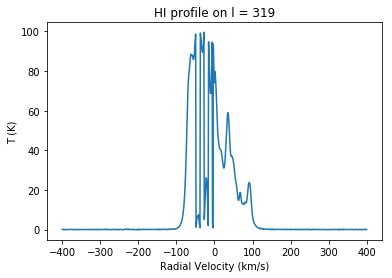

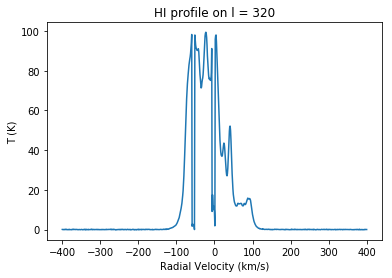

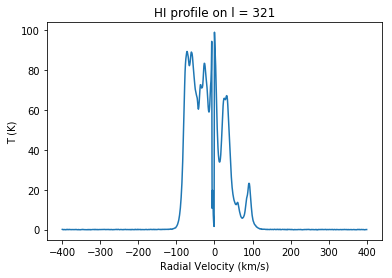

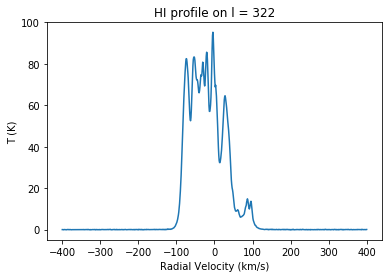

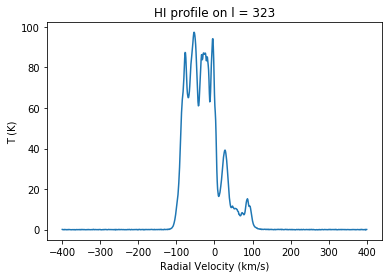

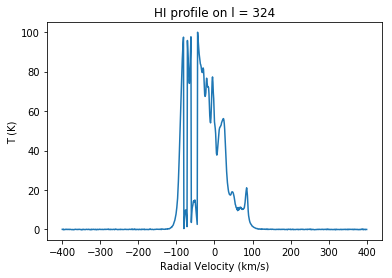

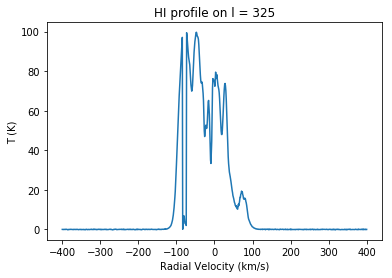

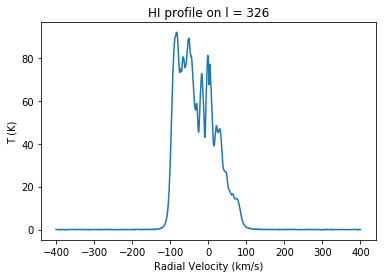

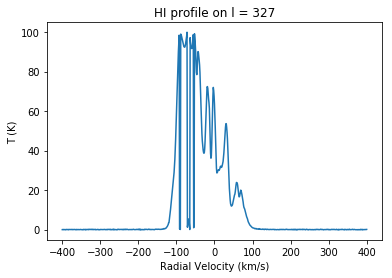

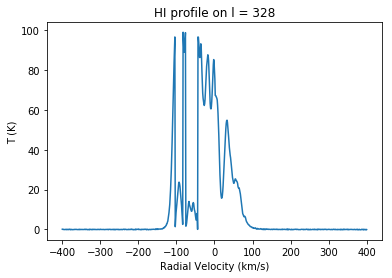

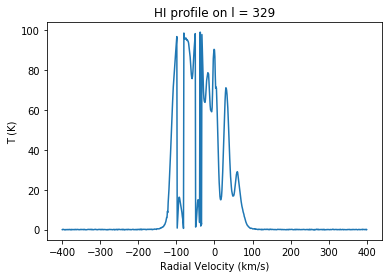

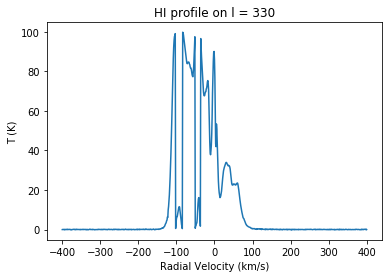

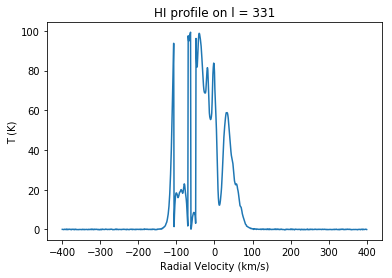

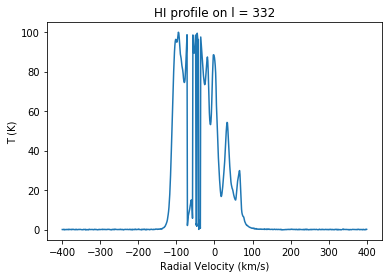

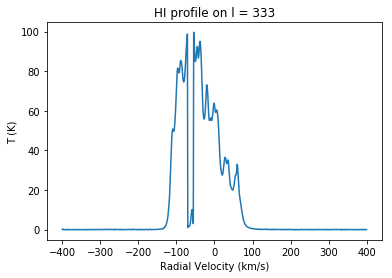

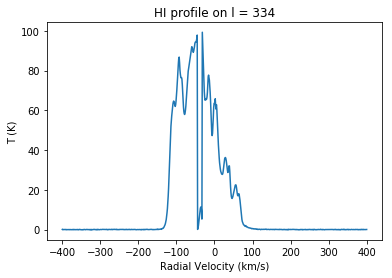

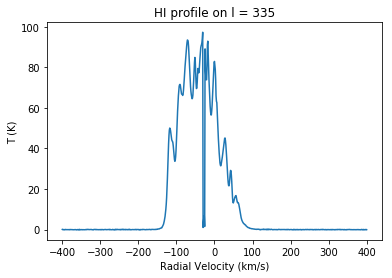

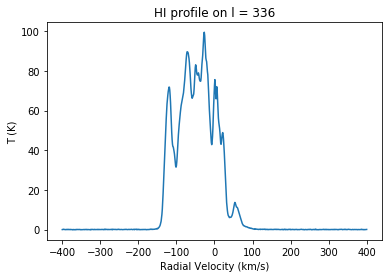

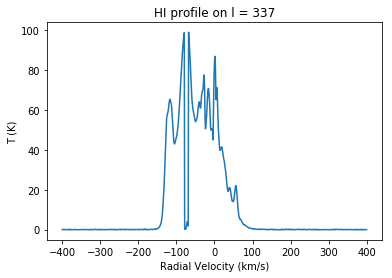

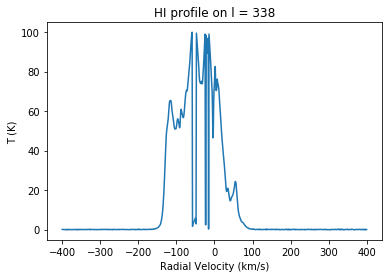

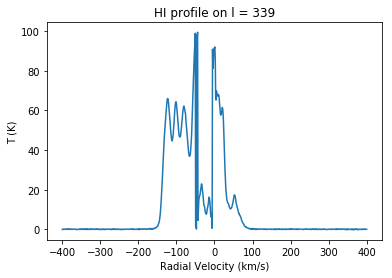

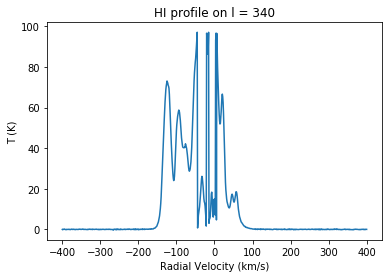

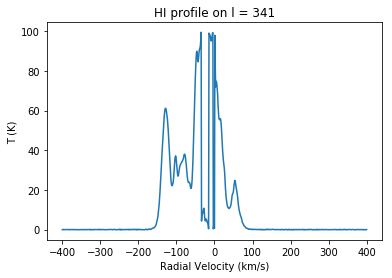

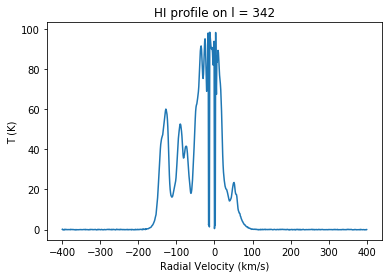

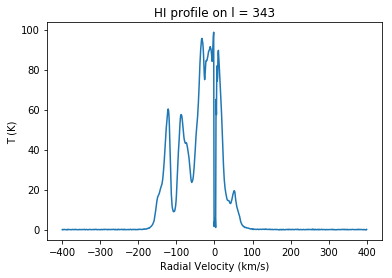

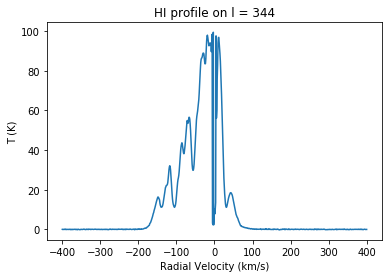

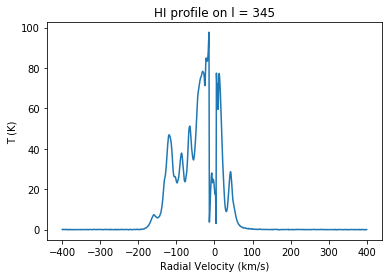

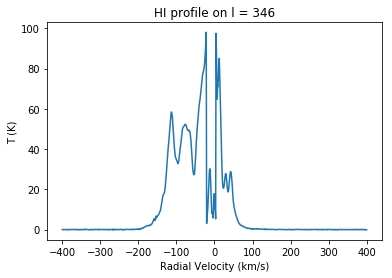

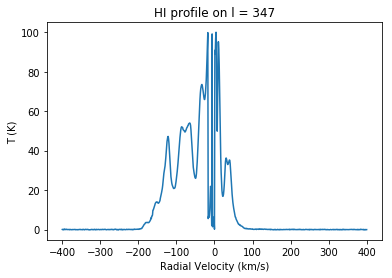

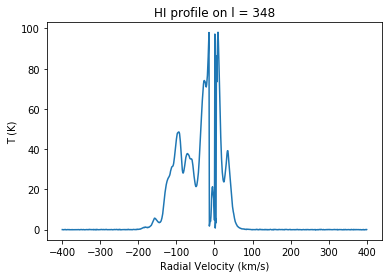

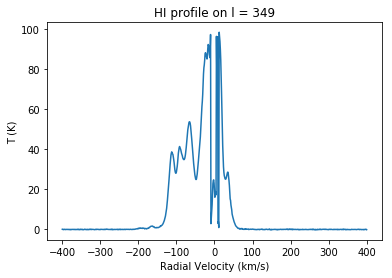

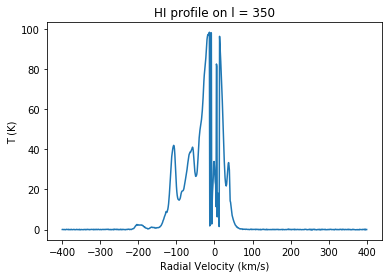

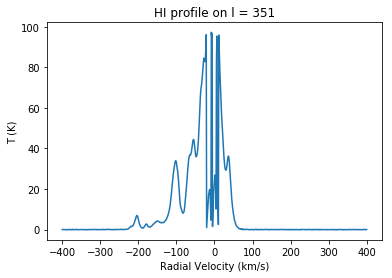

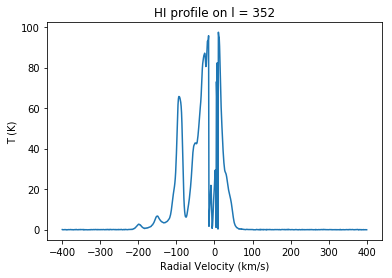

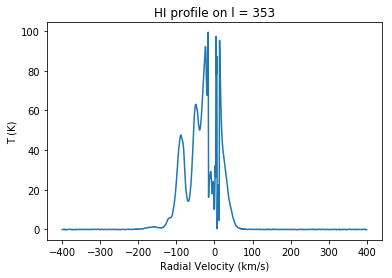

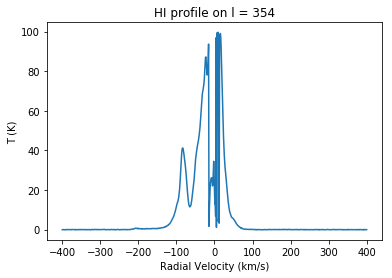

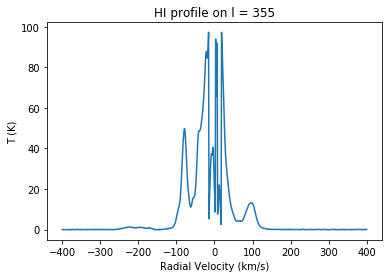

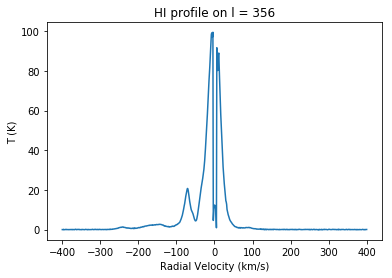

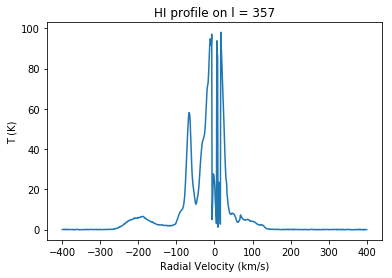

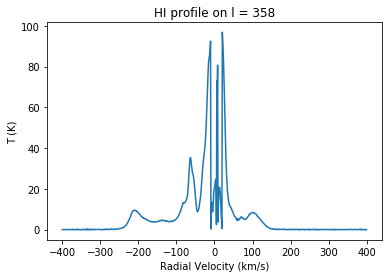

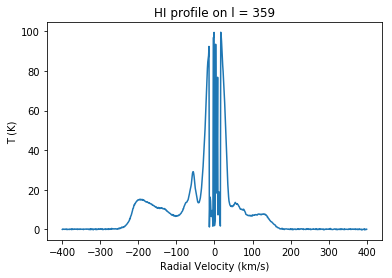

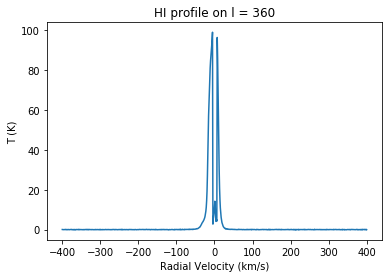

In [54]:
# plot pada berbagai l

for i in range (0,361):
    plt.figure()
    file = 'data_hi/clean/hi_l-'+str(i)+'_b-0.txt'
    data = pd.read_fwf(file,usecols=[0,1], names=['v_lsr', 'T_B'])
    plt.plot(data['v_lsr'],data['T_B'])
    title_ = 'HI profile on l = '+str(i)
    plt.title(title_)
    plt.ylabel("T (K)")
    plt.xlabel("Radial Velocity (km/s)")
    plotname = 'data_hi/image/hi_l-'+str(i)+'_b-0.jpg'
    plt.savefig(plotname)
    plt.figure()
    
    

In [46]:
# untuk 0<l<180 maka kita ekstrak puncak di kiri 
from scipy.signal import argrelmax, argrelmin
from peakdetect import peakdetect
puncak_vr = 0
maxima = []
vr_maxima = []
for i in range(0,180):
    file = 'data_hi/clean/hi_l-'+str(i)+'_b-0.txt'
    data = pd.read_fwf(file,usecols=[0,1], names=['v_lsr', 'T_B'])
    peaks = peakdetect(data['T_B'].astype(float),lookahead=30)
    #print(len(peaks[0]))
    #length = len(peaks[0])
    u = 0
    while (peaks[0][u][1] <10):
        #peaks = peak[0][i][1] 
        #print(peaks[0][u][1])
        u = u+1
    maxima.append(peaks[0][u][1])
    vr = data.loc[data['T_B'] == peaks[0][u][1], 'v_lsr'].iloc[0]
    vr_maxima.append(vr)
    

for i in range(180,360):
    file = 'data_hi/clean/hi_l-'+str(i)+'_b-0.txt'
    data = pd.read_fwf(file,usecols=[0,1], names=['v_lsr', 'T_B'])
    peaks = peakdetect(data['T_B'].astype(float),lookahead=30)
    #print(peaks)
    #length = len(peaks[0])
    u = len(peaks[0])-1
    while (peaks[0][u][1] <10):
        print(peaks[0][u][1])
        u = u-1
    maxima.append(peaks[0][u][1])
    vr = data.loc[data['T_B'] == peaks[0][u][1], 'v_lsr'].iloc[0]
    vr_maxima.append(vr)


    

0.13
0.17
0.12
0.12
0.12
0.13
0.11
0.1
0.14
0.14
0.12
0.1
0.12
0.11
0.12
0.18
0.13
0.13
0.11
0.15
0.15
0.15
0.09
0.14
0.11
0.24
0.15
0.15
0.11
0.14
0.12
0.13
0.15
0.11
0.15
0.16
0.14
0.16
0.09
0.11
0.16
0.13
0.15
0.14
0.15
0.11
0.13
0.08
0.15
0.1
0.14
0.13
0.14
0.09
0.11
0.11
0.15
0.16
0.13
0.14
0.13
0.13
0.13
0.09
0.1
0.14
0.1
0.12
0.13
0.11
0.16
0.13
0.16
0.1
0.09
0.11
0.16
0.1
0.12
0.15
0.12
0.1
0.1
0.14
0.14
0.09
0.13
0.16
0.1
0.11
0.16
0.12
0.09
0.1
0.1
0.11
0.16
0.16
0.11
0.13
0.12
0.1
0.07
0.15
0.12
0.14
0.15
0.14
0.1
0.12
0.16
0.12
0.15
0.12
0.13
0.14
0.11
0.12
0.12
0.17
0.07
0.11
0.09
0.1
0.13
0.11
0.14
0.1
0.13
0.1
0.16
0.11
0.14
0.17
0.14
0.16
0.11
0.13
0.12
0.12
0.09
0.15
0.12
0.13
0.13
0.09
0.16
0.08
0.16
0.1
0.17
0.19
0.18
0.1
0.13
0.12
0.13
0.14
0.17
0.14
0.14
0.17
0.14
0.15
0.05
0.11
0.12
0.12
0.11
0.15
0.13
0.11
0.1
0.12
0.17
0.12
0.13
0.14
0.12
0.14
0.18
0.1
0.15
0.14
0.14
0.11
0.22
0.09
0.15
0.12
0.12
0.17
0.14
0.12
0.16
0.09
0.16
0.18
0.16
0.13
0.16
0.15
0.14
0.15
0

In [47]:
vr_maxima

[-17.52,
 1.03,
 15.46,
 17.52,
 -14.43,
 -11.34,
 -7.21,
 -17.52,
 -13.4,
 15.46,
 -1.03,
 -13.4,
 23.7,
 1.03,
 2.06,
 22.67,
 35.03,
 16.49,
 16.49,
 24.73,
 10.3,
 16.49,
 17.52,
 20.61,
 57.71,
 1.03,
 25.77,
 -30.92,
 28.86,
 22.67,
 25.76,
 -17.52,
 23.7,
 22.67,
 53.58,
 -24.73,
 -32.97,
 -37.1,
 -32.97,
 -32.97,
 -29.88,
 -35.03,
 -35.04,
 64.92,
 34.01,
 -45.34,
 -41.22,
 -42.25,
 -47.4,
 -46.37,
 -48.43,
 -51.53,
 -49.47,
 -54.62,
 -55.65,
 -57.71,
 -60.8,
 -61.83,
 -62.86,
 -56.68,
 -59.77,
 -62.86,
 -63.89,
 -63.89,
 -66.98,
 -68.01,
 -57.71,
 -61.83,
 -61.83,
 -68.01,
 -70.07,
 -64.92,
 -72.13,
 -52.55,
 -69.04,
 -75.22,
 3.09,
 -78.32,
 -74.2,
 6.18,
 -5.15,
 -1.03,
 -42.25,
 -43.28,
 -42.25,
 -40.19,
 -40.19,
 -15.46,
 -44.31,
 -23.7,
 -45.34,
 -95.84,
 -97.9,
 -44.31,
 -45.34,
 -45.34,
 -44.31,
 -39.16,
 -34.01,
 -34.01,
 -58.74,
 -52.56,
 -53.59,
 -53.59,
 -50.5,
 -51.52,
 -56.68,
 -51.53,
 -51.53,
 -48.43,
 -96.88,
 -97.91,
 -97.91,
 -45.35,
 -49.46,
 -99.97,
 -99.97

20 9.4 0.3 7.6
21 15.5 0.5 7.1
22 16.0 0.6 7.1
23 18.3 5.5 -4.4
24 59.9 1.6 4.8
25 0.0 0.0 8.5
26 25.1 0.9 6.7
27 -29.7 8.6 -8.4
28 26.1 0.9 6.7
29 24.4 6.3 -2.9
30 26.9 1.0 6.8
31 -19.1 8.5 -5.6
32 26.1 6.6 -2.1
33 23.9 6.8 -2.0
34 53.8 2.0 5.6
35 -26.3 9.5 -5.0
36 -32.2 10.0 -5.3
37 -37.9 10.5 -5.5
38 -32.1 10.2 -4.5
39 -34.1 10.4 -4.3
40 -31.9 10.3 -3.8
41 -34.0 10.5 -3.6
42 -36.1 10.7 -3.4
43 65.2 5.1 3.0
44 35.1 1.7 6.7
45 -46.6 11.7 -3.2
46 -40.4 11.2 -2.3
47 -42.6 11.3 -2.1
48 -49.0 11.9 -2.2
49 -47.0 11.7 -1.7
50 -49.2 11.9 -1.5
51 -51.4 12.0 -1.3
52 -49.3 11.8 -0.7
53 -55.8 12.4 -0.8
54 -53.8 12.1 -0.3
55 -56.0 12.3 -0.1
56 -62.3 12.9 -0.2
57 -60.4 12.6 0.3
58 -62.5 12.7 0.5
59 -56.2 12.0 1.3
60 -58.4 12.1 1.5
61 -64.8 12.7 1.5
62 -62.8 12.4 1.9
63 -64.9 12.5 2.1
64 -67.0 12.6 2.4
65 -69.1 12.7 2.6
66 -58.1 11.4 3.4
67 -60.3 11.5 3.6
68 -62.4 11.6 3.8
69 -68.8 12.1 3.8
70 -70.8 12.2 4.1
71 -64.1 11.4 4.6
72 -70.4 11.9 4.6
73 -54.2 10.0 5.4
74 -69.9 11.5 5.2
75 -76.0 12.1 5.3
7

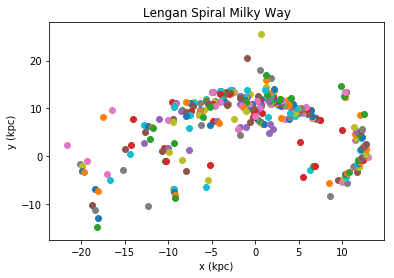

In [52]:
# l < 20 derajat tidak digunakan
for i in range(20,340):
    file = 'data_rotasi/clean/rotation_b-0_l-'+str(i)+'.txt'
    data = pd.read_fwf(file,usecols=[1,5,6], names=['v_rot', 'x','y'])
    list_vr = data['v_rot'].values.tolist()
    #print(list_vr)
    lam = min(list_vr, key=lambda x:abs(x-vr_maxima[i]))
    #print(vr_maxima[i], lam)
    x = data.loc[data['v_rot'] == lam, 'x'].iloc[0]
    y = data.loc[data['v_rot'] == lam, 'y'].iloc[0]
    print(i,lam,x,y)
    plt.scatter(x,y)
plt.title('Lengan Spiral Milky Way')
plt.xlabel('x (kpc)')
plt.ylabel('y (kpc)')
save = 'data_rotasi/image/'+'-'+str(i)+'.jpg'
plt.savefig(save)